# 24시 반려동물 셀프목욕방 창업을 위한 서울시 동단위 입지 분석
DROP D Bit(Team2) - 정사라, 김원, 김지우, 박태영, 이의준

발표일: 2020.10.16

## 1. 데이터의 이해 및 EDA

### 1.1 데이터의 이해

히스토그램으로 데이터 분포 확인

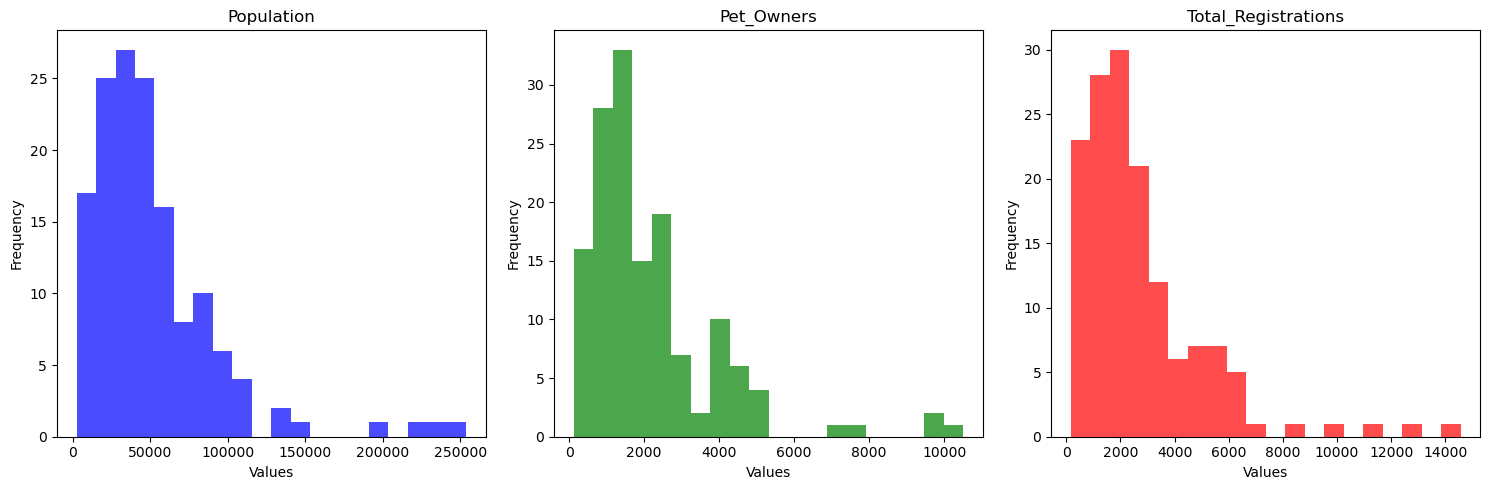

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Population 히스토그램
axs[0].hist(data['Population'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Population')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Pet_Owners 히스토그램
axs[1].hist(data['Pet_Owners'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Pet_Owners')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Total_Registrations 히스토그램
axs[2].hist(data['Total_Registrations'], bins=20, color='red', alpha=0.7)
axs[2].set_title('Total_Registrations')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

평균, 중위수, 최빈값 구하기

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode

def calculate_statistics(df):
    # 각 열의 평균 계산
    mean_values = df.mean()
    
    # 각 열의 중위수 계산
    median_values = df.median()
    
    # 각 열의 최빈값 계산
    mode_values = df.mode().iloc[0]  # 최빈값이 여러 개일 경우 첫 번째 값을 선택
    
    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Mode': mode_values})
    
    return result_df

df = pd.DataFrame(data)
df = df.iloc[:,3:]
# 함수 호출
result = calculate_statistics(df)

# 결과 출력
print(result)

                             Mean   Median    Mode
Hospital_Counts          4.689655      3.0     2.0
Sales_Counts             2.110345      1.0     0.0
Consignment_Counts       4.193103      3.0     1.0
Transit_Counts           2.262069      1.0     0.0
Production_Counts        0.172414      0.0     0.0
Import_Counts            0.089655      0.0     0.0
Population           50827.779310  41423.0  2457.0
Pet_Owners            2144.627586   1621.0  1559.0
Total_Registrations   2725.820690   2064.0  2005.0


### 1.2 BOX PLOT

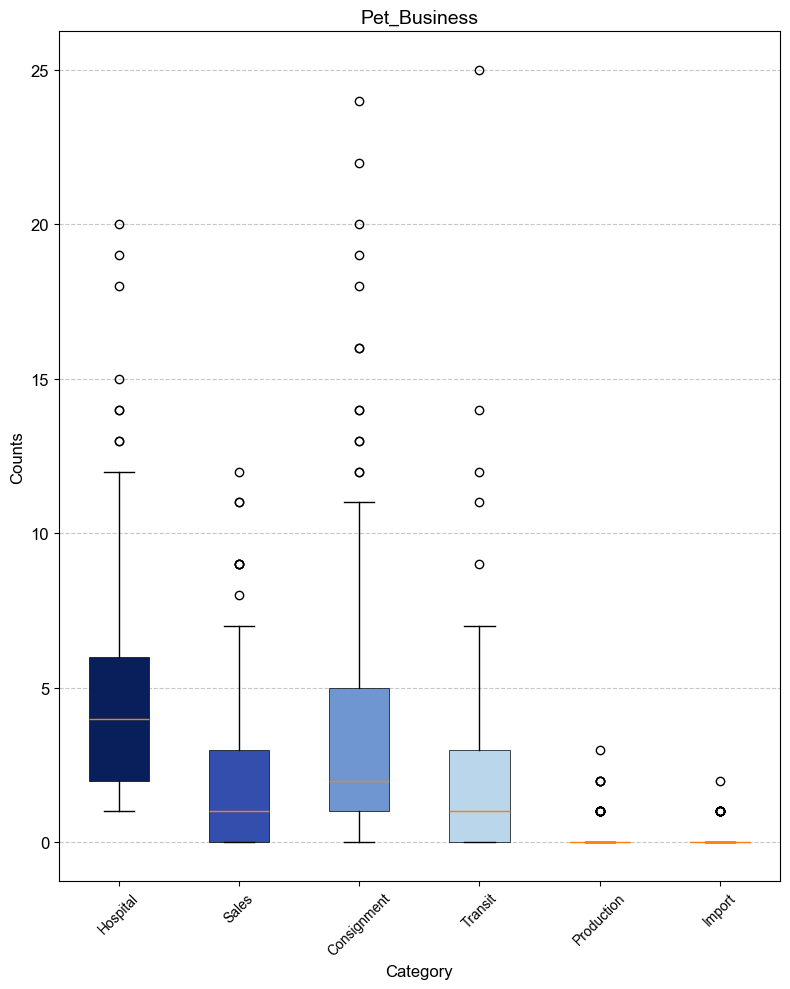

In [ ]:

# X 축: Gu, Y 축: 업종
plt.figure(figsize=(8, 10), facecolor='white')  # 용지의 배경색을 변경하려면 facecolor를 설정합니다.
bp = plt.boxplot([Gu_Dong_Pet_Business['Hospital_Counts'],
             Gu_Dong_Pet_Business['Sales_Counts'],
             Gu_Dong_Pet_Business['Consignment_Counts'],
             Gu_Dong_Pet_Business['Transit_Counts'],
             Gu_Dong_Pet_Business['Production_Counts'],
             Gu_Dong_Pet_Business['Import_Counts']],
             labels=['Hospital', 'Sales', 'Consignment', 'Transit', 'Production', 'Import'], patch_artist=True)

colors = ['#081F5C', '#334EAC', '#7096D1', '#BAD6EB', '#D0E3FF', '#FFF9F0']  # 원하는 색상으로 변경 가능

for box, color in zip(bp['boxes'], colors):
    # 박스 색상 설정
    box.set(color='black', linewidth=0.5)  # 테두리 색상과 두께
    box.set(facecolor=color)  # 박스 내부 색상 설정

plt.xlabel('Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Pet_Business', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.tight_layout()

plt.savefig('Pet_Business.png', dpi=300, bbox_inches='tight')

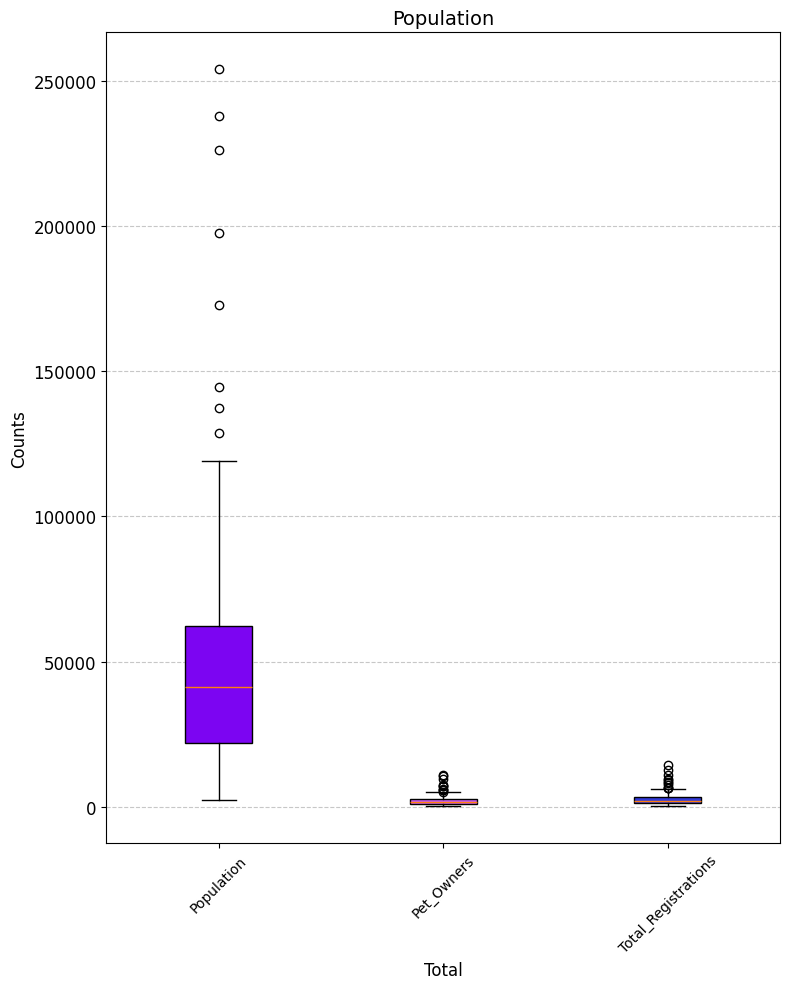

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# X 축: 구, Y 축: 업종
plt.figure(figsize=(8, 10))
bp = plt.boxplot([Seoul_Gu_Dong_Pet_Business_Population['Population'],
             Seoul_Gu_Dong_Pet_Business_Population['Pet_Owners'],
             Seoul_Gu_Dong_Pet_Business_Population['Total_Registrations']],
             labels=['Population', 'Pet_Owners', 'Total_Registrations'], patch_artist=True)

colors = ['#7C05F2', '#C55CF2', '#323AD9']  # 각 열에 대한 원하는 색상을 리스트로 지정합니다.

for box, color in zip(bp['boxes'], colors):
    # 박스 색상 설정
    box.set(color='black', linewidth=1)  # 테두리 색상과 두께
    box.set(facecolor=color)  # 박스 내부 색상 설정

plt.xlabel('Total', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Population', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.tight_layout()
plt.savefig('Population_Pet_Owners_Total_Registrations.png', dpi=300, bbox_inches='tight')

### 1.3 상관관계 분석

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('동별통합데이터.csv')
data

,Unnamed: 0,Gu,Dong,Hospital_Counts,Sales_Counts,Consignment_Counts,Transit_Counts,Production_Counts,Import_Counts,Population,Pet_Owners,Total_Registrations
0,0,영등포구,영등포동,5,5,5,0,1,0,53949,1709,2207
1,1,영등포구,여의동,4,3,3,0,0,0,33713,1659,2064
2,2,영등포구,양평동,3,1,1,2,0,0,41180,1672,2099
3,3,영등포구,신길동,14,3,8,1,2,0,99799,4212,5303
4,4,영등포구,문래동,3,2,2,1,0,0,32342,1222,1636
...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,용산구,이태원동,3,1,10,0,0,0,18022,1687,2487
141,141,용산구,이촌동,3,0,4,0,0,0,33445,1855,2432
142,142,용산구,원효로동,4,0,4,1,0,0,13763,1559,2287
143,143,용산구,용산동,3,0,3,0,0,0,10271,985,1301


In [ ]:
# 열들 간의 상관 관계 계산
correlation = data.corr()

# 소수점 둘째자리까지 반올림

correlation

,Hospital_Counts,Sales_Counts,Consignment_Counts,Transit_Counts,Production_Counts,Import_Counts,Population,Pet_Owners,Total_Registrations
Hospital_Counts,1.000000,0.581367,0.774490,0.634743,0.123025,0.079955,0.747738,0.808877,0.804647
Sales_Counts,0.581367,1.000000,0.705499,0.465372,0.180450,0.297126,0.446194,0.463478,0.453116
Consignment_Counts,0.774490,0.705499,1.000000,0.642121,0.068255,0.160868,0.655493,0.672881,0.688781
Transit_Counts,0.634743,0.465372,0.642121,1.000000,0.194937,-0.017100,0.803840,0.768660,0.773551
Production_Counts,0.123025,0.180450,0.068255,0.194937,1.000000,0.125925,0.138339,0.147008,0.155359
Import_Counts,0.079955,0.297126,0.160868,-0.017100,0.125925,1.000000,-0.041835,-0.013956,-0.014803
Population,0.747738,0.446194,0.655493,0.803840,0.138339,-0.041835,1.000000,0.907495,0.906300
Pet_Owners,0.808877,0.463478,0.672881,0.768660,0.147008,-0.013956,0.907495,1.000000,0.995426
Total_Registrations,0.804647,0.453116,0.688781,0.773551,0.155359,-0.014803,0.906300,0.995426,1.000000


In [ ]:
# 상관관계 행렬에서 0.9 이상인 값의 행과 열 이름 추출
# 0.9 이상일 때, 강한 양적 선형관계를 가짐
correlation_pair = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if correlation.iloc[i, j] >= 0.9:
            pair = (correlation.columns[i], correlation.columns[j], correlation.iloc[i, j])
            correlation_pair.append(pair)

# 중복된 쌍 제거
unique_pair = []
for pair in correlation_pair:
    if (pair[1], pair[0], pair[2]) not in unique_pair:  # 반대 방향의 쌍이 중복되는 경우를 제거
        unique_pair.append(pair)

print("상관관계가 0.9 이상인 값")
for pair in correlation_pair:
    print(pair)

상관관계가 0.9 이상인 값
('Population', 'Pet_Owners', 0.9074949974644287)
('Population', 'Total_Registrations', 0.9062996896378848)
('Pet_Owners', 'Total_Registrations', 0.995426420835974)


In [ ]:
# 필요한 행만 추출
correlation_강 = pd.DataFrame(unique_pair)
correlation_강 = correlation_강.iloc[:3]
correlation_강.rename(columns ={0:'변수1', 1:'변수2',2:'상관계수'},inplace=True)
correlation_강

,변수1,변수2,상관계수
0,Population,Pet_Owners,0.907495
1,Population,Total_Registrations,0.906300
2,Pet_Owners,Total_Registrations,0.995426


PAIRPLOT을 이용하여 상관관계 파악하기

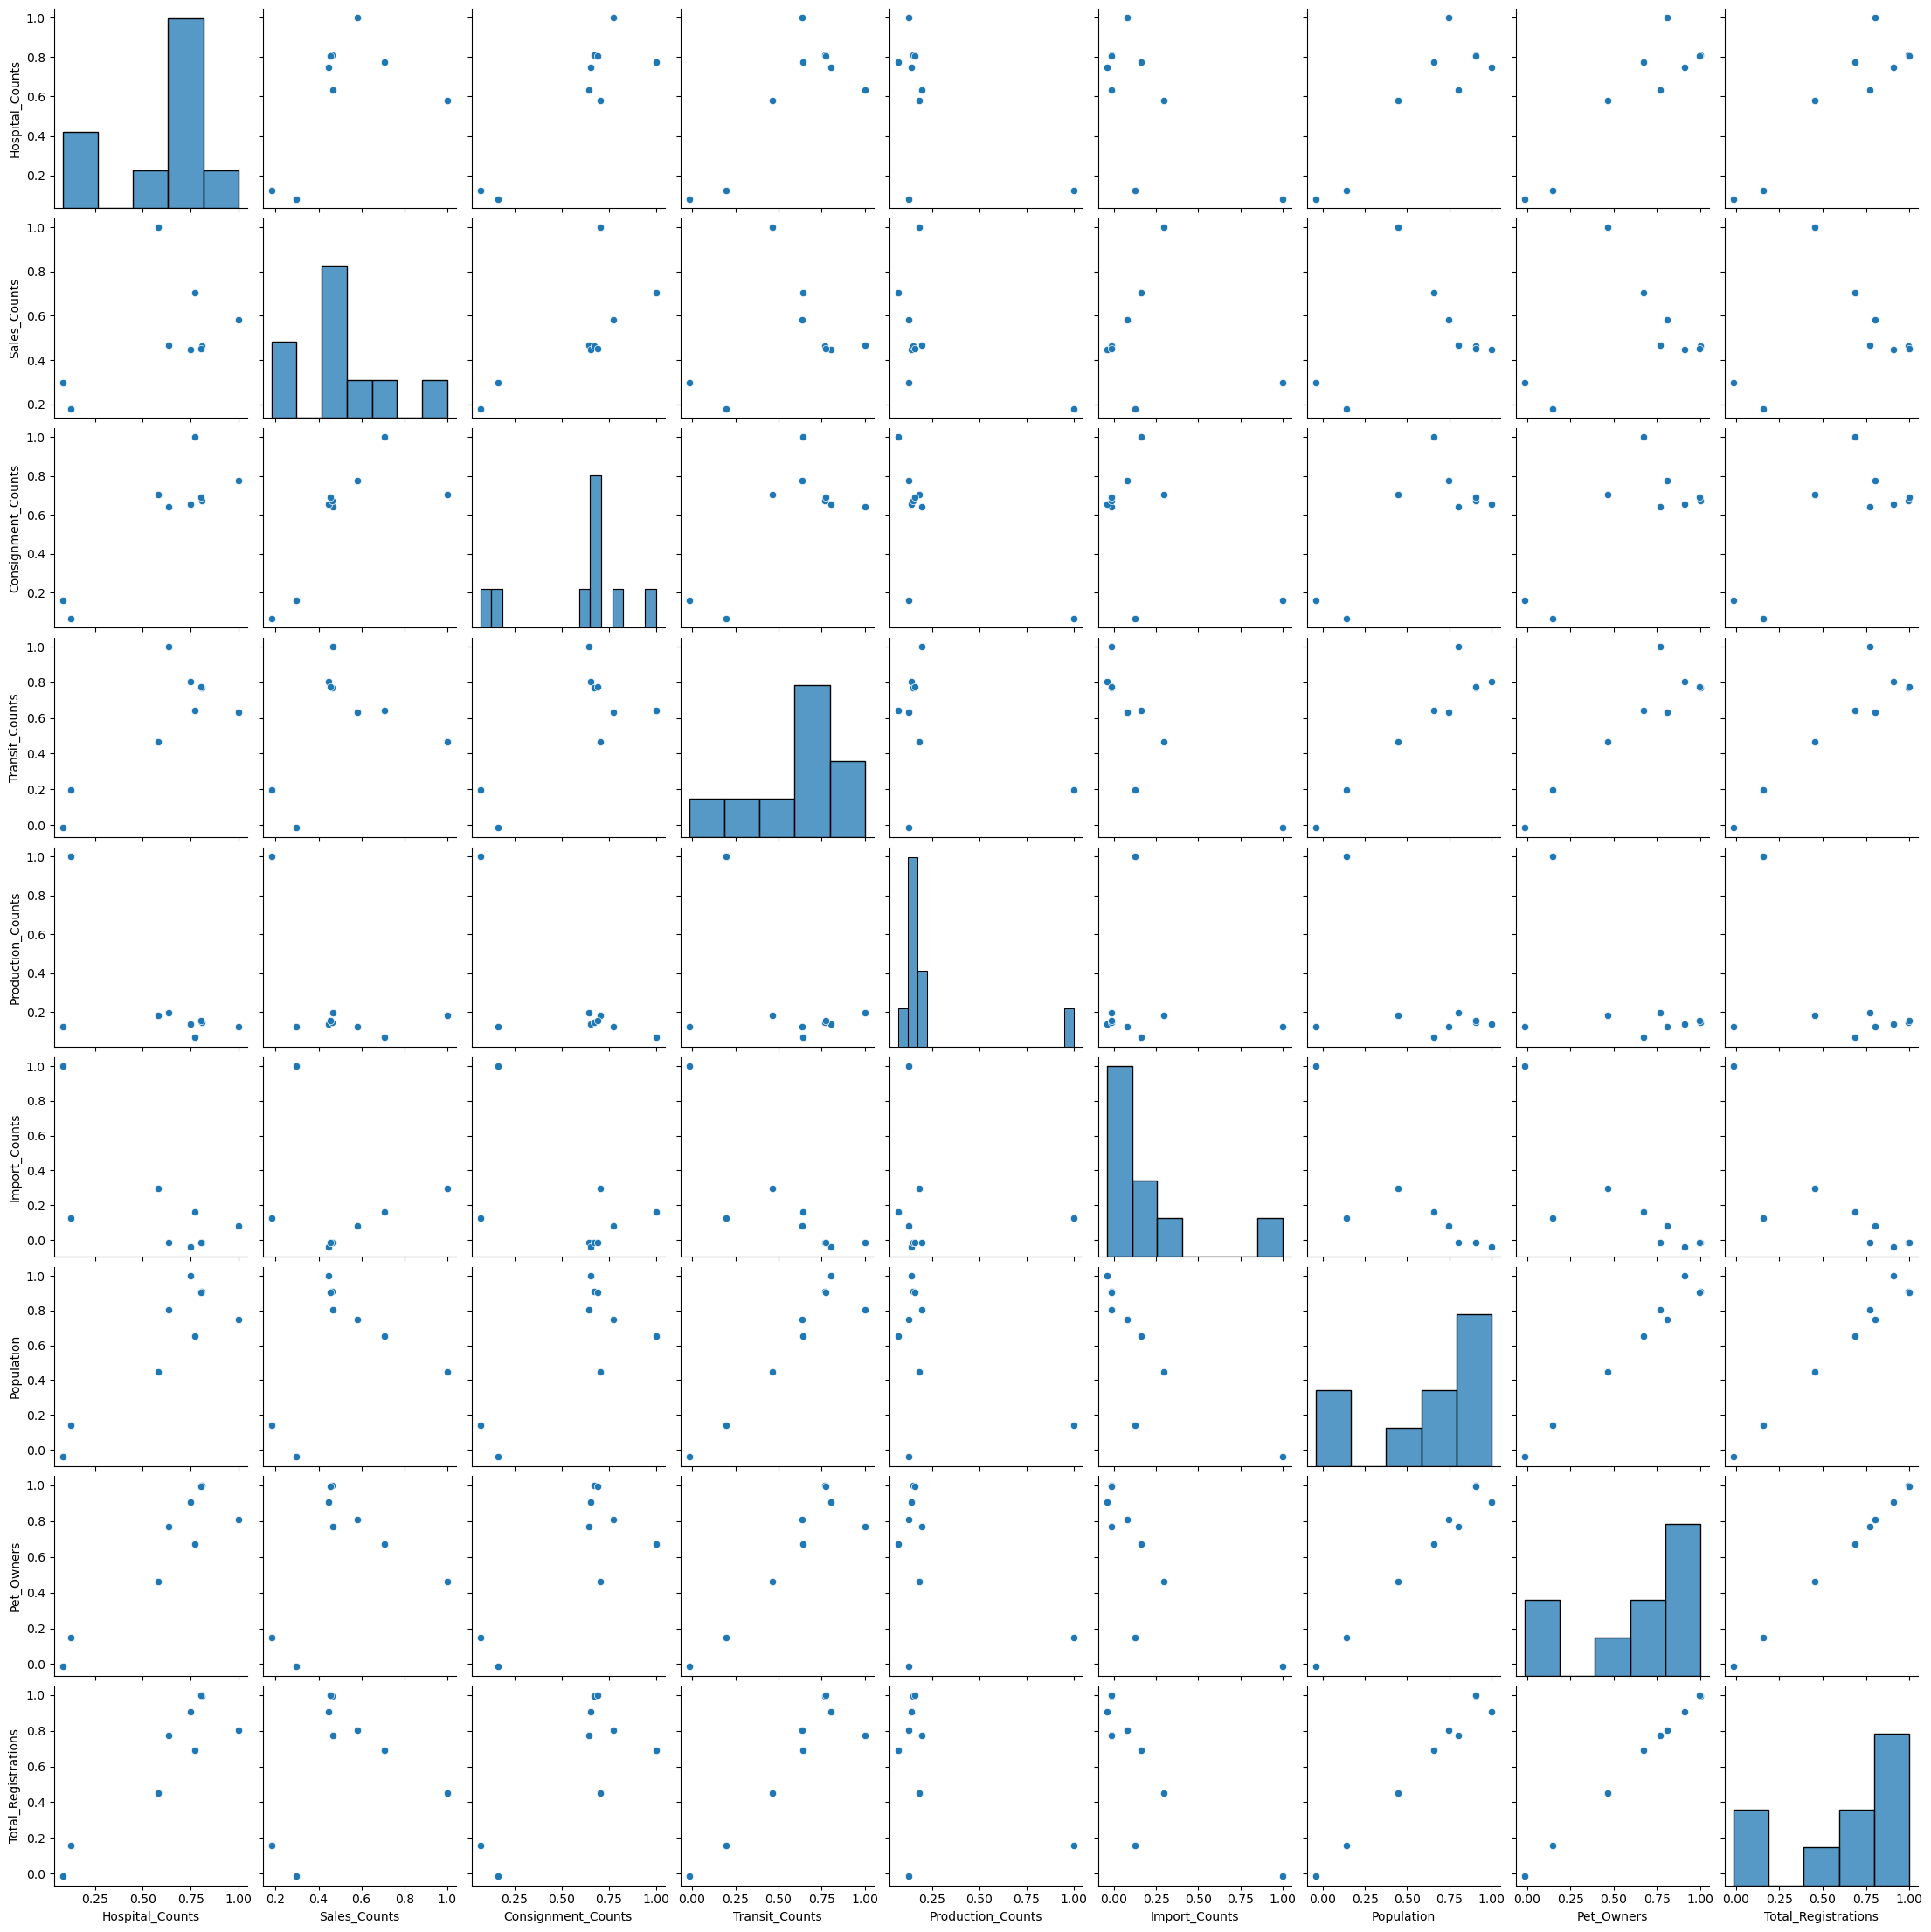

In [ ]:
sns.pairplot(correlation, diag_kind = 'hist')
plt.show()

In [ ]:
# 한글 깨짐 현상 벙지

if os.name =='nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

강한 상관관계를 가지는 변수 파악하기

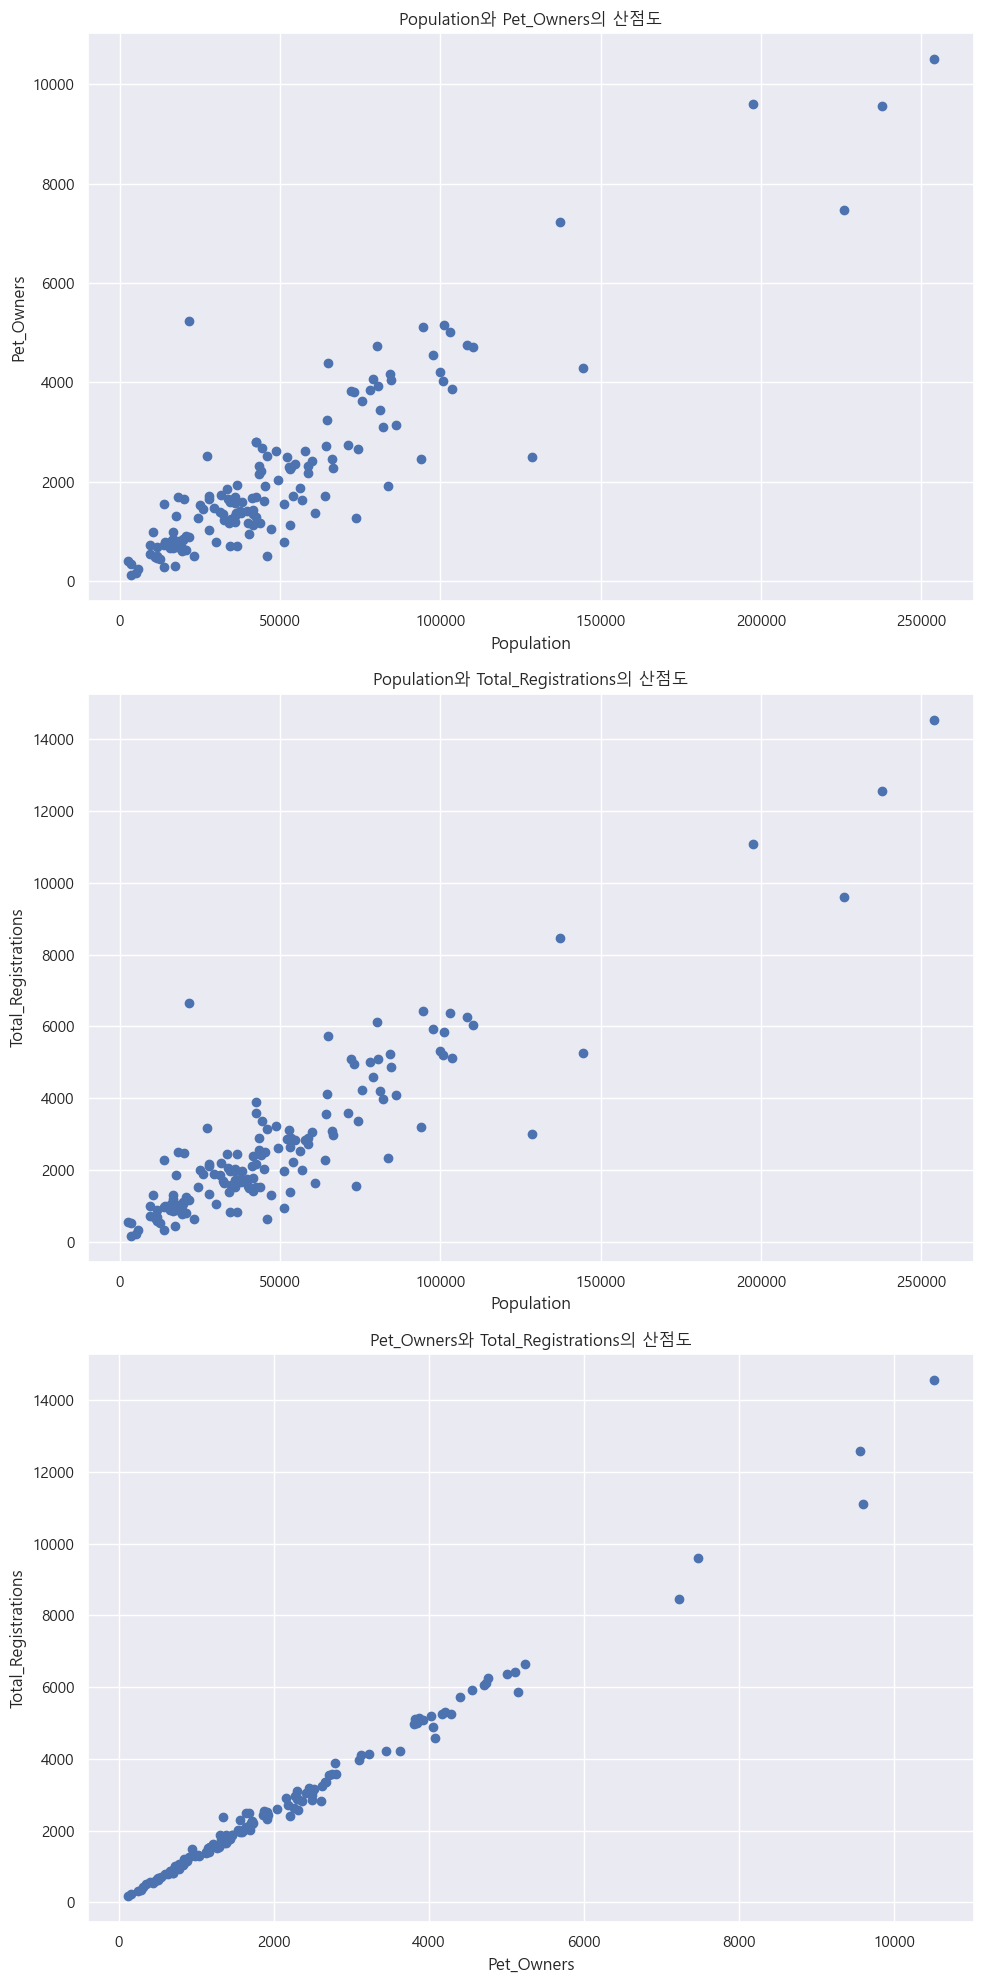

In [ ]:

# 산점도 그리기
fig, ax = plt.subplots(nrows=3, figsize=(10, 20))

# 각각의 산점도를 서브플롯에 그리기
for i in range(3):
    x_label = correlation_강['변수1'][i]
    y_label = correlation_강['변수2'][i]
    ax[i].scatter(x=data[x_label], y=data[y_label])
    ax[i].set_xlabel(x_label)
    ax[i].set_ylabel(y_label)
    ax[i].set_title(f'{x_label}와 {y_label}의 산점도')

plt.tight_layout()
plt.show()

히트맵으로 시각화하여 상관관계 파악하기

In [ ]:
# 표 그리기
import plotly.express as px
fig = px.imshow(correlation, text_auto=True)
fig.show()

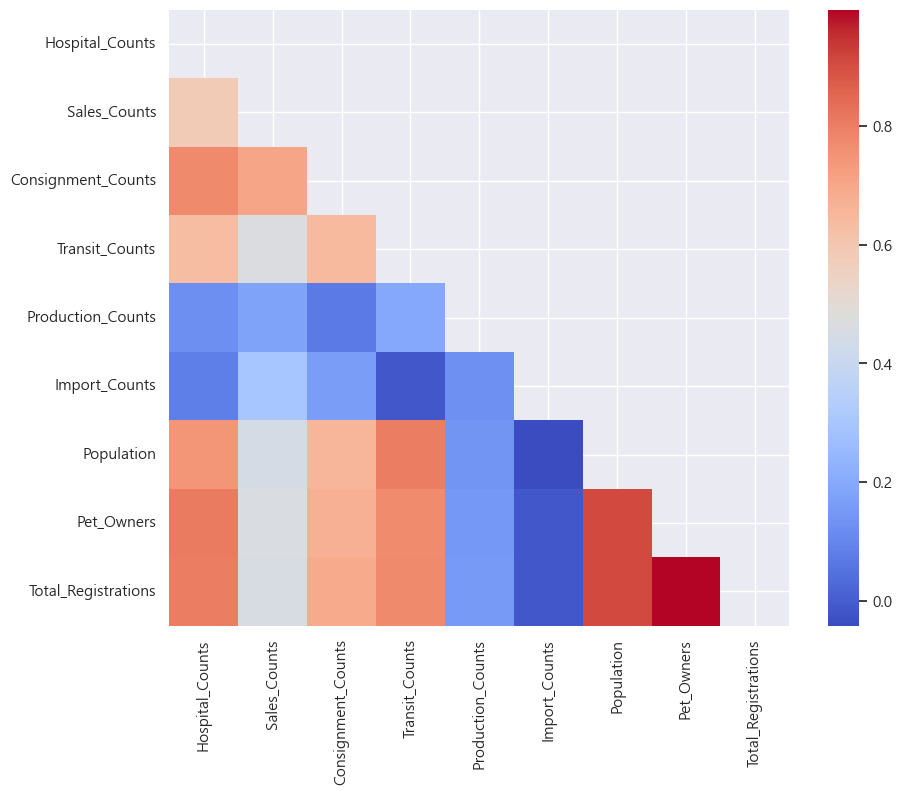

In [ ]:
# heatmap 이용

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='coolwarm', mask=np.triu(np.ones_like(correlation)))

plt.show()

# np.triu 함수를 사용하여 matrix 삼각행렬로 만들기
# mask = np.triu(np.ones_like(correlation))


## 2. 데이터의 준비

### 2.1 변수 정리 과정


- 구별 동물 병원

- Pet_영등포_병원, Pet_송파_병원 , Pet_성북_병원 , Pet_관악_병원, Pet_광진_병원 , Pet_서초_병원 , Pet_노원_병원, Pet_구로_병원, Pet_금천_병원, Pet_강서_병원,
- Pet_강남_병원, Pet_강동_병원,Pet_강북_병원,Pet_동작_병원, Pet_동대문_병원, Pet_은평_병원, Pet_중구_병원,Pet_종로_병원,Pet_중랑_병원, Pet_용산_병원, Pet_마포_병원, Pet_도봉_병원, Pet_성동_병원, Pet_양천_병원, Pet_서대문_병원

- 구별 동물 판매업

- Pet_영등포_판매 , Pet_송파_판매, Pet_성북_판매 , Pet_관악_판매, Pet_광진_판매, Pet_서초_판매 , Pet_노원_판매, Pet_구로_판매 , Pet_금천_판매 , Pet_강서_판매 ,
- Pet_강남_판매, Pet_강동_판매,Pet_강동_판매,Pet_동작_판매 , Pet_동대문_판매, Pet_은평_판매, Pet_중구_판매, Pet_종로_판매, Pet_중랑_판매, Pet_용산_판매, Pet_마포_판매, Pet_도봉_판매, Pet_성동_판매, Pet_양천_판매, Pet_서대문_판매

- 구별 동물 위탁업

- Pet_영등포_위탁, Pet_송파_위탁, Pet_성북_위탁 , Pet_관악_위탁, Pet_광진_위탁, Pet_서초_위탁 , Pet_노원_위탁 , Pet_구로_위탁 , Pet_금천_위탁, Pet_강서_위탁,
- Pet_강남_위탁, Pet_강동_위탁,Pet_강동_위탁,Pet_동작_위탁, Pet_동대문_위탁, Pet_은평_위탁 , Pet_중구_위탁, Pet_종로_위탁 , Pet_중랑_위탁 , Pet_용산_위탁, Pet_마포_위탁, Pet_도봉_위탁, Pet_성동_위탁, Pet_양천_위탁, Pet_서대문_위탁

- 구별 동물 운송업

- Pet_영등포_운송, Pet_송파_운송, Pet_성북_운송, Pet_관악_운송, Pet_광진_운송, Pet_서초_운송 , Pet_노원_운송 , Pet_구로_운송 , Pet_금천_운송, Pet_강서_운송,
-  Pet_강남_운송,Pet_강동_운송,Pet_강동_운송,Pet_동작_운송, Pet_동대문_운송, Pet_은평_운송, Pet_중구_운송, Pet_종로_운송, Pet_중랑_운송, Pet_용산_운송, Pet_마포_운송, Pet_도봉_운송, Pet_성동_운송, Pet_양천_운송, Pet_서대문_운송

- 구별 동물 생산업

- Pet_영등포_생산, Pet_송파_생산, Pet_성북_생산, Pet_관악_생산 , Pet_광진_생산 , Pet_서초_생산 , Pet_노원_생산 , Pet_구로_생산 , Pet_금천_생산, Pet_강서_생산,
- Pet_강남_생산,Pet_강동_생산,Pet_강동_생산,Pet_동작_생산 , Pet_동대문_생산, Pet_은평_생산, Pet_중구_생산, Pet_종로_생산, Pet_중랑_생산, Pet_용산_생산, Pet_마포_생산, Pet_도봉_생산, Pet_성동_생산, Pet_양천_생산, Pet_서대문_생산

- 구별 동물 수입업

- Pet_영등포_수입, Pet_송파_수입, Pet_성북_수입, Pet_관악_수입, Pet_광진_수입 , Pet_서초_수입 , Pet_노원_수입 , Pet_구로_수입 , Pet_금천_수입 , Pet_강서_수입,
-  Pet_강남_수입,Pet_강동_수입,Pet_강동_수입,Pet_동작_수입 , Pet_동대문_수입, Pet_은평_수입, Pet_중구_수입, Pet_종로_수입, Pet_중랑_수입, Pet_용산_수입, Pet_마포_수입, Pet_도봉_수입, Pet_성동_수입, Pet_양천_수입, Pet_서대문_수입



< 구/동 별 카테고리 카운트 입니다.>

- Seoul_Pet_Hospital_Attach
- Seoul_Pet_Sales_Attach
- Seoul_Pet_Consignment_Attach
- Seoul_Pet_Transit_Attach
- Seoul_Pet_Production_Attach
- Seoul_Pet_Import_Attach



<Gu Dong Population, Pet_Owners, Total_Registrations 입니다.>

- Youngsan_Pet_Population
- Jungrang_Pet_Population
- Jungro_Pet_Population
- Junggu_Pet_Population
- Eunpyeong_Pet_Population
- Dongdaemun_Pet_Population
- Dongjak_Pet_Population
- Gangbuk_Pet_Population
- Gangdong_Pet_Population
- Gangnam_Pet_Population
- Gangseo_Pet_Population
- Guemcheon_Pet_Population
- Guro_Pet_Population
- Nowon_Pet_Population
- Seocho_Pet_Population
- Gwangjin_Pet_Population
- Gwanak_Pet_Population
- Seoungbuk_Pet_Population
- Songpa_Pet_Population
- Yeongdeungpo_Pet_Population
- Seodaemun_Pet_Population
- Yangcheon_Pet_Population
- Seongdong_Pet_Population
- Mapo_Pet_Population
- Dobong_Pet_Population


- 구/동 업종 카운트 = Gu_Dong_Pet_Business
- 인구/펫오너/총 펫 등록수 = Seoul_Population_merged


- 인구+펫+업종 = Seoul_Gu_Dong_Pet_Business_Population

### 2.2 전처리 
- 나의 파트 전처리 부분만 포함

2.2.1 반려동물 등록현황 전처리

서대문구 반려동물 등록현황 전처리 과정

In [ ]:
file_path = "C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울_반려동물_등록현황/서울특별시_동대문구_반려동물등록현황_20201014.csv"
df_raw = pd.read_csv(file_path, encoding='euc-kr')
# 파일불러오기 
# 인코딩 문제 발생, 현재 파일이 EUC-KR로 인코딩되어 있으므로 encoding='euc-kr'으로 지정

In [ ]:
# 원본 데이터
df_raw.head()

,읍면동(법정동),등록주체_시군구,등록주체_대행업체,등록주체_기타(이벤트 등),등록형태_내장형RFID,등록형태_외장형RFID,등록형태_인식표RFID,등록품종수,동물소유자수,동물소유자당동물등록수,총등록수,데이터기준일자
0,신설동,6.0,188.0,0.0,70.0,103.0,21.0,32.0,147.0,1.32,194.0,2020-10-14
1,용두동,70.0,1275.0,2.0,508.0,721.0,118.0,64.0,1025.0,1.31,1347.0,2020-10-14
2,이문동,52.0,2320.0,1.0,1034.0,1196.0,143.0,67.0,1344.0,1.77,2373.0,2020-10-14
3,장안동,133.0,3450.0,1.0,1508.0,1871.0,205.0,78.0,2745.0,1.31,3584.0,2020-10-14
4,전농동,76.0,1882.0,2.0,1030.0,800.0,130.0,67.0,1559.0,1.26,1960.0,2020-10-14


In [ ]:
# 원본데이터 복사
dongdaemun = df_raw.copy()

In [ ]:
dongdaemun['구']="동대문구"
dongdaemun.head()

,읍면동(법정동),등록주체_시군구,등록주체_대행업체,등록주체_기타(이벤트 등),등록형태_내장형RFID,등록형태_외장형RFID,등록형태_인식표RFID,등록품종수,동물소유자수,동물소유자당동물등록수,총등록수,데이터기준일자,구
0,신설동,6.0,188.0,0.0,70.0,103.0,21.0,32.0,147.0,1.32,194.0,2020-10-14,동대문구
1,용두동,70.0,1275.0,2.0,508.0,721.0,118.0,64.0,1025.0,1.31,1347.0,2020-10-14,동대문구
2,이문동,52.0,2320.0,1.0,1034.0,1196.0,143.0,67.0,1344.0,1.77,2373.0,2020-10-14,동대문구
3,장안동,133.0,3450.0,1.0,1508.0,1871.0,205.0,78.0,2745.0,1.31,3584.0,2020-10-14,동대문구
4,전농동,76.0,1882.0,2.0,1030.0,800.0,130.0,67.0,1559.0,1.26,1960.0,2020-10-14,동대문구


In [ ]:
# 필요한 컬럼만 남기기
dongdaemun = dongdaemun[['구','읍면동(법정동)','동물소유자수','총등록수']]

# 컬럼명 변경하기
dongdaemun.rename(columns={'구':'Gu',
                            '읍면동(법정동)':'Dong',
                            '동물소유자수':'Pet_Owners',
                            '총등록수':'Total_Registrations'},
                  inplace=True)

dongdaemun

,Gu,Dong,Pet_Owners,Total_Registrations
0,동대문구,신설동,147.0,194.0
1,동대문구,용두동,1025.0,1347.0
2,동대문구,이문동,1344.0,2373.0
3,동대문구,장안동,2745.0,3584.0
4,동대문구,전농동,1559.0,1960.0
5,동대문구,제기동,901.0,1194.0
6,동대문구,회기동,285.0,335.0
7,동대문구,휘경동,1130.0,1413.0
8,동대문구,답십리동,1873.0,2538.0
9,동대문구,청량리동,659.0,873.0


In [ ]:
# 결측치 제거
dongdaemun.dropna(inplace=True)
dongdaemun

,Gu,Dong,Pet_Owners,Total_Registrations
0,동대문구,신설동,147.0,194.0
1,동대문구,용두동,1025.0,1347.0
2,동대문구,이문동,1344.0,2373.0
3,동대문구,장안동,2745.0,3584.0
4,동대문구,전농동,1559.0,1960.0
5,동대문구,제기동,901.0,1194.0
6,동대문구,회기동,285.0,335.0
7,동대문구,휘경동,1130.0,1413.0
8,동대문구,답십리동,1873.0,2538.0
9,동대문구,청량리동,659.0,873.0


In [ ]:
# 파일 저장하기
dongdaemun.to_csv("./dongdaemun_지우_v1.csv")

동작구 반려동물 등록현황 전처리 과정

In [ ]:
file_path = "C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울_반려동물_등록현황/서울특별시_동작구_반려동물등록현황_20230825.csv"
df_raw = pd.read_csv(file_path, encoding='euc-kr')
# 파일불러오기 
# 인코딩 문제 발생, 현재 파일이 EUC-KR로 인코딩되어 있으므로 encoding='euc-kr'으로 지정

In [ ]:
# 원본 데이터
df_raw.head()

,시군구,법정동,내장형,외장형,인식표,반려동물총계,등록품종수,동물소유자수,동물소유자당동물등록수
0,서울특별시 동작구,본동,278,240,67,585,55,462,1.27
1,서울특별시 동작구,대방동,825,930,224,1979,73,1579,1.25
2,서울특별시 동작구,동작동,171,148,23,342,42,283,1.21
3,서울특별시 동작구,사당동,2336,2345,445,5126,101,3871,1.32
4,서울특별시 동작구,상도동,2903,2623,593,6119,97,4738,1.29


In [ ]:
# 원본데이터 복사
dongjak = df_raw.copy()

In [ ]:
dongjak['구']="동작구"
dongjak.head()

,시군구,법정동,내장형,외장형,인식표,반려동물총계,등록품종수,동물소유자수,동물소유자당동물등록수,구
0,서울특별시 동작구,본동,278,240,67,585,55,462,1.27,동작구
1,서울특별시 동작구,대방동,825,930,224,1979,73,1579,1.25,동작구
2,서울특별시 동작구,동작동,171,148,23,342,42,283,1.21,동작구
3,서울특별시 동작구,사당동,2336,2345,445,5126,101,3871,1.32,동작구
4,서울특별시 동작구,상도동,2903,2623,593,6119,97,4738,1.29,동작구


In [ ]:
# 필요한 컬럼만 남기기
dongjak = dongjak[['구','법정동','동물소유자수','반려동물총계']]

# 컬럼명 변경하기
dongjak.rename(columns={'구':'Gu',
                            '법정동':'Dong',
                            '동물소유자수':'Pet_Owners',
                            '반려동물총계':'Total_Registrations'},
                  inplace=True)

dongjak

C:\Users\82108\AppData\Local\Temp\ipykernel_2872\1314179154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongjak.rename(columns={'구':'Gu',


,Gu,Dong,Pet_Owners,Total_Registrations
0,동작구,본동,462,585
1,동작구,대방동,1579,1979
2,동작구,동작동,283,342
3,동작구,사당동,3871,5126
4,동작구,상도동,4738,6119
5,동작구,흑석동,1340,1702
6,동작구,상도1동,382,495
7,동작구,노량진동,1158,1509
8,동작구,신대방동,1888,2438


In [ ]:
# 결측치 제거
dongjak.dropna(inplace=True)
dongjak

C:\Users\82108\AppData\Local\Temp\ipykernel_2872\2428412660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongjak.dropna(inplace=True)


,Gu,Dong,Pet_Owners,Total_Registrations
0,동작구,본동,462,585
1,동작구,대방동,1579,1979
2,동작구,동작동,283,342
3,동작구,사당동,3871,5126
4,동작구,상도동,4738,6119
5,동작구,흑석동,1340,1702
6,동작구,상도1동,382,495
7,동작구,노량진동,1158,1509
8,동작구,신대방동,1888,2438


In [ ]:
# 파일 저장하기
dongjak.to_csv("./dongjak_지우_v1.csv")

마포구 동작구 반려동물 등록현황 전처리 과정

In [ ]:
file_path = "C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울특별시_마포구 동물등록 현황_20240216.csv"
df_raw = pd.read_csv(file_path, encoding='euc-kr')
# 파일불러오기 
# 인코딩 문제 발생, 현재 파일이 EUC-KR로 인코딩되어 있으므로 encoding='euc-kr'으로 지정

In [ ]:
# 원본 데이터
df_raw.head()

,법정동,RFID 내장형,RFID 외장형,RFID 인식표,합계,데이터기준일자,Unnamed: 6
0,중동,335.0,253.0,46.0,634.0,45337.0,NaN
1,공덕동,871.0,555.0,79.0,1505.0,45337.0,NaN
2,구수동,33.0,25.0,4.0,62.0,45337.0,NaN
3,당인동,53.0,36.0,3.0,92.0,45337.0,NaN
4,대흥동,470.0,295.0,33.0,798.0,45337.0,NaN


In [ ]:
# 원본데이터 복사
dongjak = df_raw.copy()

In [ ]:
# 필요한 컬럼만 남기기
dongjak = dongjak[['법정동','동물소유자수','동물소유자당동물등록수','반려동물총계']]

# 컬럼명 변경하기
dongjak.rename(columns={'법정동':'Location',
                            '동물소유자수':'Pet_Owners',
                            '동물소유자당동물등록수':'Registrations_per_Pet_Owner',
                            '반려동물총계':'Total_Registrations'},
                  inplace=True)

dongjak

,Location,Pet_Owners,Registrations_per_Pet_Owner,Total_Registrations
0,본동,462,1.27,585
1,대방동,1579,1.25,1979
2,동작동,283,1.21,342
3,사당동,3871,1.32,5126
4,상도동,4738,1.29,6119
5,흑석동,1340,1.27,1702
6,상도1동,382,1.30,495
7,노량진동,1158,1.30,1509
8,신대방동,1888,1.29,2438


In [ ]:
# 결측치 제거
dongjak.dropna(inplace=True)
dongjak

,Location,Pet_Owners,Registrations_per_Pet_Owner,Total_Registrations
0,본동,462,1.27,585
1,대방동,1579,1.25,1979
2,동작동,283,1.21,342
3,사당동,3871,1.32,5126
4,상도동,4738,1.29,6119
5,흑석동,1340,1.27,1702
6,상도1동,382,1.30,495
7,노량진동,1158,1.30,1509
8,신대방동,1888,1.29,2438


In [ ]:
# 파일 저장하기
dongjak.to_csv("./ddongjak.csv")

서초구 동작구 반려동물 등록현황 전처리 과정

In [ ]:
Seocho_raw = pd.read_csv("C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울_반려동물_등록현황/서울특별시_서초구_동물등록 현황_20230630.csv", encoding='euc-kr')
# 파일불러오기 
# 인코딩 문제 발생, 현재 파일이 EUC-KR로 인코딩되어 있으므로 encoding='euc-kr'으로 지정

In [ ]:
# 원본 데이터
Seocho_raw.head()

,법정동,내장형무선인식(RFID),외장형무선인식(RFID),인식표,등록품종수,동물소유자수,데이터기준일
0,내곡동,198,199,42,48,308,2023-06-30
1,반포동,2595,2176,432,85,4034,2023-06-30
2,방배동,3426,2443,559,90,5111,2023-06-30
3,서초동,3173,2611,466,94,4760,2023-06-30
4,신원동,154,151,24,39,244,2023-06-30


In [ ]:
# 원본데이터 복사
seocho = Seocho_raw.copy()

In [ ]:
seocho['구']="서초구"
seocho.head()

,법정동,내장형무선인식(RFID),외장형무선인식(RFID),인식표,등록품종수,동물소유자수,데이터기준일,구
0,내곡동,198,199,42,48,308,2023-06-30,서초구
1,반포동,2595,2176,432,85,4034,2023-06-30,서초구
2,방배동,3426,2443,559,90,5111,2023-06-30,서초구
3,서초동,3173,2611,466,94,4760,2023-06-30,서초구
4,신원동,154,151,24,39,244,2023-06-30,서초구


In [ ]:
# 반려동물총계 컬럼 만들기
seocho['반려동물총계'] = seocho['내장형무선인식(RFID)'] + seocho['외장형무선인식(RFID)'] + seocho['인식표']

seocho.head()

,법정동,내장형무선인식(RFID),외장형무선인식(RFID),인식표,등록품종수,동물소유자수,데이터기준일,구,반려동물총계
0,내곡동,198,199,42,48,308,2023-06-30,서초구,439
1,반포동,2595,2176,432,85,4034,2023-06-30,서초구,5203
2,방배동,3426,2443,559,90,5111,2023-06-30,서초구,6428
3,서초동,3173,2611,466,94,4760,2023-06-30,서초구,6250
4,신원동,154,151,24,39,244,2023-06-30,서초구,329


In [ ]:
# 필요한 컬럼만 남기기
seocho = seocho[['구','법정동','동물소유자수','반려동물총계']]

# 컬럼명 변경하기
seocho.rename(columns={'구':'Gu',
                        '법정동':'Dong',
                        '동물소유자수':'Pet_Owners',
                        '반려동물총계':'Total_Registrations'},
                  inplace=True)

seocho

,Gu,Dong,Pet_Owners,Total_Registrations
0,서초구,내곡동,308,439
1,서초구,반포동,4034,5203
2,서초구,방배동,5111,6428
3,서초구,서초동,4760,6250
4,서초구,신원동,244,329
5,서초구,양재동,1717,2263
6,서초구,염곡동,54,83
7,서초구,우면동,1106,1460
8,서초구,원지동,12,16
9,서초구,잠원동,2518,3166


In [ ]:
# 결측치 제거
seocho.dropna(inplace=True)
seocho

,Gu,Dong,Pet_Owners,Total_Registrations
0,서초구,내곡동,308,439
1,서초구,반포동,4034,5203
2,서초구,방배동,5111,6428
3,서초구,서초동,4760,6250
4,서초구,신원동,244,329
5,서초구,양재동,1717,2263
6,서초구,염곡동,54,83
7,서초구,우면동,1106,1460
8,서초구,원지동,12,16
9,서초구,잠원동,2518,3166


In [ ]:
# 파일 저장하기
seocho.to_csv("./seocho_지우_v1.csv")

2.2.2 반려동물 관련업 전처리

동물 운송업 영업장 목록 전처리

In [ ]:
# 파일 불러오기
file_path = "C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울_동물운송업_영업장/서울_동물운송업_영업장목록_20240427 - 수정본.csv"
df_raw = pd.read_csv(file_path)
df_raw 

,번호,구분,업체명,소재지,인허가 정보
0,409,운송,pet131나1455,서울특별시 강동구 길동 382번지 6호 우성아파트,2024
1,410,운송,pet04모2461,서울특별시 강동구 명일동 352번지 3호 명일노블리안,2024
2,411,운송,폰토스 인터네셔널,서울특별시 강동구 성내동 562번지 10호 삼성아트빌,2024
3,412,운송,pet66도 8410,서울특별시 강동구 강일동 91번지 강동리버스트7단지 702 736,2024
4,413,운송,pet116주7521,서울특별시 강동구 성내동 405번지 5호 한솔애리즈아파트,2023
...,...,...,...,...,...
431,10,운송,이예슬펫택시,서울특별시 용산구 한강로2가 2번지 185호 용산아이피아대주피오레,2020
432,11,운송,타다펫,서울특별시 용산구 보광동 78번지 4호,2018
433,3,운송,엔젤,서울특별시 중구 신당동 844번지 29통 2반,2019
434,1,운송,486펫콜 서울종로점,서울특별시 종로구 충신동 25번지 73호,2022


In [ ]:
# 원본데이터 복사
transportation = df_raw.copy()

In [ ]:
# 필요한 열만 남기기
transportation = transportation[['구분','업체명','소재지','인허가 정보']]
transportation.head(3)

,구분,업체명,소재지,인허가 정보
0,운송,pet131나1455,서울특별시 강동구 길동 382번지 6호 우성아파트,2024
1,운송,pet04모2461,서울특별시 강동구 명일동 352번지 3호 명일노블리안,2024
2,운송,폰토스 인터네셔널,서울특별시 강동구 성내동 562번지 10호 삼성아트빌,2024


In [ ]:
# 각 행정구와 동만 추출하기
transportation['행정구'] = transportation['소재지'].str.split(' ').str[1]
transportation['동'] = transportation['소재지'].str.split(' ').str[2]

# 소재지 열 제거하기
transportation = transportation[['행정구','동','구분','인허가 정보']]

# 열 이름 바꾸기
transportation.rename(columns={'행정구':'Gu',
                        '동':'Dong',
                        '구분':'Category',
                        '인허가 정보':'Current_License_info'},
                  inplace=True)

# 데이터 형태 보기
transportation.head()

,Gu,Dong,Category,Current_License_info
0,강동구,길동,운송,2024
1,강동구,명일동,운송,2024
2,강동구,성내동,운송,2024
3,강동구,강일동,운송,2024
4,강동구,성내동,운송,2023


In [ ]:
# 구, 동, 카테고리, 인허가 정보 별 수
# df: 구, 동, 카테고리, 인허가 정보를 그룹화한 수를 포함
df = transportation.groupby(['Gu', 'Dong', 'Category', 'Current_License_info']).size()
df

Gu   Dong  Category  Current_License_info
강남구  논현동   운송        2018                    2
                     2019                    1
                     2021                    2
                     2022                    1
                     2024                    1
                                            ..
중랑구  면목동   운송        2024                    1
     묵동    운송        2022                    1
                     2023                    2
     신내동   운송        2022                    1
     중화동   운송        2023                    1
Length: 298, dtype: int64

In [ ]:
# 데이터를 데이터 프레임 형식으로 변경
df = pd.DataFrame(df)

# 기존 인덱스를 열로 이동하고, 새로운 정수 인덱스 할당
df = df.reset_index()

# groupby로 구해진 수의 열을 Count라는 이름으로
# 인덱스에 idx라는 이름 할당
# rename_axis()메서드를 사용하여 인덱스 이름을 변경 가능
df = df.rename(columns={0: 'Count'}).rename_axis('idx')
df

,Gu,Dong,Category,Current_License_info,Count
idx,,,,,
0,강남구,논현동,운송,2018,2
1,강남구,논현동,운송,2019,1
2,강남구,논현동,운송,2021,2
3,강남구,논현동,운송,2022,1
4,강남구,논현동,운송,2024,1
...,...,...,...,...,...
293,중랑구,면목동,운송,2024,1
294,중랑구,묵동,운송,2022,1
295,중랑구,묵동,운송,2023,2


In [ ]:
print(df['Count'].isna().sum())  # 결측값 개수 확인
print(df['Count'].isin([np.inf, -np.inf]).sum())  # 무한대 값 개수 확인


0
0


In [ ]:
df.to_csv('운송업_Year_Gu_Dong_Counts_지우.csv')

In [ ]:
# 인덱스 오류가 있을때, reset_index() 함수를 사용하여 그룹화된 결과를 다시 인덱스를 기준으로 정렬
# reset_index(name='Counts')['Counts']
# : 위 부분은 그룹화된 결과를 다시 인덱스를 기준으로 정렬하고,
# : Counts 열만 선택하여 Series로 변환

In [ ]:
# 데이터 확인
transportation.head()

,Gu,Dong,Category,Current_License_info
0,강동구,길동,운송,2024
1,강동구,명일동,운송,2024
2,강동구,성내동,운송,2024
3,강동구,강일동,운송,2024
4,강동구,성내동,운송,2023


In [ ]:
# 필요한 행만 추출
df1 = transportation[['Gu','Dong','Category']]

df1

,Gu,Dong,Category
0,강동구,길동,운송
1,강동구,명일동,운송
2,강동구,성내동,운송
3,강동구,강일동,운송
4,강동구,성내동,운송
...,...,...,...
431,용산구,한강로2가,운송
432,용산구,보광동,운송
433,중구,신당동,운송
434,종로구,충신동,운송


In [ ]:
# 구, 동, 카테고리 별 수
# df1 = 구, 동, 카테고리 별 수를 포함한 데이터
df1 = df1.groupby(['Gu','Dong','Category']).size()

# 열의 이름을 변경하기 위해 데이터프레임의 형식으로 변경
df1 = pd.DataFrame(df1)

df1 = df1.reset_index()

# 열 이름 변경
df1 = df1.rename(columns = {0:'Count'}).rename_axis('idx')
df1

,Gu,Dong,Category,Count
idx,,,,
0,강남구,논현동,운송,7
1,강남구,대치동,운송,1
2,강남구,도곡동,운송,2
3,강남구,수서동,운송,1
4,강남구,역삼동,운송,4
...,...,...,...,...
144,중랑구,망우동,운송,4
145,중랑구,면목동,운송,6
146,중랑구,묵동,운송,3


In [ ]:
print(df1['Count'].isna().sum())  # 결측값 개수 확인
print(df1['Count'].isin([np.inf, -np.inf]).sum())  # 무한대 값 개수 확인

0
0


In [ ]:
df1.to_csv('운송업_Gu_Dong_Counts_지우.csv')

동물 동반가능 문화시설 목록 전처리

In [ ]:
file_path = r'C:\Users\82108\Desktop\jw\프로젝트\반려동물등록현황전처리전\행정동단위_동반가능_문화시설\한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터_20221130.CSV'

df_raw = pd.read_csv(file_path, encoding='cp949')

In [ ]:
# 원본데이터 복사
facility = df_raw.copy()
facility.head()

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
0,1004 약국,반려동물업,반려의료,동물약국,경기도,고양시 덕양구,동산동,NaN,352-1 번지,동세로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
1,1004섬수석미술관,반려동물업,반려동반여행,미술관,전라남도,신안군,자은면,백산리,633-54 번지,자은서부2길,...,없음,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30
2,100세건강약국,반려동물업,반려의료,동물약국,경기도,안양시 만안구,안양동,NaN,856-4 번지,안양로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
3,100세약국,반려동물업,반려의료,동물약국,서울특별시,영등포구,당산2동,NaN,217-4 번지,양평로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
4,100세약국,반려동물업,반려의료,동물약국,경기도,수원시 팔달구,인계동,NaN,942-4 번지,경수대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30


In [ ]:
# 열 명칭 확인 
facility.columns

Index(['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '번지', '도로명 이름', '건물 번호', '위도', '경도', '우편번호', '도로명주소', '지번주소', '전화번호',
       '홈페이지', '휴무일', '운영시간', '주차 가능여부', '입장(이용료)가격 정보', '반려동물 동반 가능정보',
       '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일'],
      dtype='object')

In [ ]:
# 서울특별시를 제외한 다른 
facility = facility[facility['시도 명칭'] == '서울특별시']

# 필요한 컬럼만 남기기
facility = facility[['시군구 명칭','법정읍면동명칭','시설명','카테고리2','카테고리3']]

# 컬럼 이름 바꾸기

facility.rename(columns={'시군구 명칭':'Gu',
                         '법정읍면동명칭':'Dong',
                         '시설명':'name',
                         '카테고리2':'Category',
                         '카테고리3':'Category1'},
                inplace=True)
facility.head()


,Gu,Dong,name,Category,Category1
3,영등포구,당산2동,100세약국,반려의료,동물약국
6,중구,신당동,100코달리 와인바,반려동물식당카페,카페
15,금천구,시흥동,1층메디컬약국,반려의료,동물약국
16,성동구,하왕십리동,1층이화약국,반려의료,동물약국
26,용산구,보광동,21세기동물병원,반려의료,동물병원


In [ ]:
facility = facility[(facility['Category'] == '반려동물식당카페') | (facility['Category'] == '반려동반여행')]

facility

,Gu,Dong,name,Category,Category1
6,중구,신당동,100코달리 와인바,반려동물식당카페,카페
156,종로구,인사동,2Cats,반려동물식당카페,카페
228,마포구,서교동,38도씨식당,반려동물식당카페,식당
251,영등포구,여의도동,63아트,반려동반여행,미술관
434,종로구,가회동,가회민화박물관,반려동반여행,박물관
...,...,...,...,...,...
23846,강남구,신사동,K현대미술관,반려동반여행,미술관
23868,종로구,수송동,OCI미술관,반려동반여행,미술관
23870,강서구,화곡동,OMW 애견카페,반려동물식당카페,카페
23889,마포구,공덕동,staywell cafe,반려동물식당카페,카페


In [ ]:
# 이름을 제외한 컬럼
facility1 =  facility[['Gu','Dong','Category','Category1']]

In [ ]:
# 카테고리로 분류한 동별 동반 가능 시설 
facility1 = facility1.groupby(['Gu','Dong','Category','Category1']).size()

facility1

Gu   Dong  Category  Category1
강남구  개포동   반려동반여행    박물관          1
     논현동   반려동물식당카페  식당           1
                     카페           7
           반려동반여행    박물관          1
     대치동   반려동물식당카페  카페           2
                                 ..
중구   흥인동   반려동반여행    문예회관         1
중랑구  망우동   반려동반여행    여행지          2
     면목동   반려동물식당카페  카페           2
           반려동반여행    여행지          1
     신내동   반려동물식당카페  카페           1
Length: 253, dtype: int64

In [ ]:
# 데이터프레임 형태로 변경
facility1 = pd.DataFrame(facility1)

# 데이터프레임 이름 변경
facility1 = facility1.reset_index()
facility1 = facility1.rename(columns = {
                                        0:'Count'
                                        }).rename_axis('idx')

facility1

,Gu,Dong,Category,Category1,Count
idx,,,,,
0,강남구,개포동,반려동반여행,박물관,1
1,강남구,논현동,반려동물식당카페,식당,1
2,강남구,논현동,반려동물식당카페,카페,7
3,강남구,논현동,반려동반여행,박물관,1
4,강남구,대치동,반려동물식당카페,카페,2
...,...,...,...,...,...
248,중구,흥인동,반려동반여행,문예회관,1
249,중랑구,망우동,반려동반여행,여행지,2
250,중랑구,면목동,반려동물식당카페,카페,2


In [ ]:
facility1.to_csv('동반가능시설_category_동반여행,식당카페_지우.csv')

In [ ]:
# 카테고리 2기준(반려동물여행, 반려동물식당카페)
facility2=facility[['Gu','Dong','Category']]
facility2


,Gu,Dong,Category
6,중구,신당동,반려동물식당카페
156,종로구,인사동,반려동물식당카페
228,마포구,서교동,반려동물식당카페
251,영등포구,여의도동,반려동반여행
434,종로구,가회동,반려동반여행
...,...,...,...
23846,강남구,신사동,반려동반여행
23868,종로구,수송동,반려동반여행
23870,강서구,화곡동,반려동물식당카페
23889,마포구,공덕동,반려동물식당카페


In [ ]:
# 구, 동, 카테고리 별 수
facility2 = facility2.groupby(['Gu','Dong','Category']).size()

# 데이터프레임 형식으로 변경
facility2 = pd.DataFrame(facility2)

# 열 이름 변경
facility2 = facility2.reset_index()
facility2 = facility2.rename(columns={0:'Count'}).rename_axis('idx')

facility2

,Gu,Dong,Category,Count
idx,,,,
0,강남구,개포동,반려동반여행,1
1,강남구,논현동,반려동물식당카페,8
2,강남구,논현동,반려동반여행,1
3,강남구,대치동,반려동물식당카페,2
4,강남구,대치동,반려동반여행,3
...,...,...,...,...
203,중구,흥인동,반려동반여행,1
204,중랑구,망우동,반려동반여행,2
205,중랑구,면목동,반려동물식당카페,2


In [ ]:
facility2.to_csv('동반가능시설_큰category기준_지우.csv')

In [ ]:
# 반려 동반 여행 기준으로 count
facility3 = facility[facility['Category']=='반려동반여행']

# 구, 동, 카테고리 별 수
facility3 = facility3.groupby(['Gu','Dong','Category']).size()

# 데이터프레임 형식으로 변경
facility3 = pd.DataFrame(facility3)

# 열 이름 변경
facility3 = facility3.reset_index()
facility3 = facility3.rename(columns={0:'Count'}).rename_axis('idx')

facility3






,Gu,Dong,Category,Count
idx,,,,
0,강남구,개포동,반려동반여행,1
1,강남구,논현동,반려동반여행,1
2,강남구,대치동,반려동반여행,3
3,강남구,신사동,반려동반여행,4
4,강남구,역삼동,반려동반여행,1
...,...,...,...,...
129,중구,필동,반려동반여행,2
130,중구,회현동,반려동반여행,2
131,중구,흥인동,반려동반여행,1


In [ ]:
facility3.to_csv('반려동반여행_지우.csv')

In [ ]:
# 반려동물식당카페 기준으로 count
facility4 = facility[facility['Category']=='반려동물식당카페']

# 구, 동, 카테고리 별 수
facility4 = facility4.groupby(['Gu','Dong','Category']).size()

# 데이터프레임 형식으로 변경
facility4 = pd.DataFrame(facility4)

# 열 이름 변경
facility4 = facility4.reset_index()
facility4 = facility4.rename(columns={0:'Count'}).rename_axis('idx')

facility4

,Gu,Dong,Category,Count
idx,,,,
0,강남구,논현동,반려동물식당카페,8
1,강남구,대치동,반려동물식당카페,2
2,강남구,삼성동,반려동물식당카페,1
3,강남구,신사동,반려동물식당카페,5
4,강남구,역삼동,반려동물식당카페,6
...,...,...,...,...
69,중구,명동,반려동물식당카페,2
70,중구,신당동,반려동물식당카페,1
71,중구,을지로동,반려동물식당카페,1


In [ ]:
facility4.to_csv('반려동물식당카페_지우.csv')

2.2.3 동별 인구 수 데이터 전처리
- 회귀분석의 변수로 사용됨

동대문구 반려동물 등록현황과 인구수 데이터 병합

In [ ]:
# 반려동물 현황 등록 데이터 불러오기
dongdaemun_registration_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리후/반려동물등록현황/dongdaemun_지우_v1.csv')

# 원본 데이터 복사
dongdaemun_registration = dongdaemun_registration_row.copy()

# 원하는 컬럼 추출
dongdaemun_registration = dongdaemun_registration[['Gu','Dong','Pet_Owners','Total_Registrations']]

dongdaemun_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,동대문구,신설동,147.0,194.0
1,동대문구,용두동,1025.0,1347.0
2,동대문구,이문동,1344.0,2373.0
3,동대문구,장안동,2745.0,3584.0
4,동대문구,전농동,1559.0,1960.0
5,동대문구,제기동,901.0,1194.0
6,동대문구,회기동,285.0,335.0
7,동대문구,휘경동,1130.0,1413.0
8,동대문구,답십리동,1873.0,2538.0
9,동대문구,청량리동,659.0,873.0


In [ ]:
# 인구 수 데이터 불러오기
dongdaemun_population_raw = pd.read_csv('../인구수전처리전/동대문구_인구수.csv', encoding='euc-kr')

# 원본 데이터 복사
dongdaemun_pop = dongdaemun_population_raw.copy()

# 원하는 컬럼 추출
dongdaemun_pop = dongdaemun_pop[['동별(3)','2023']]

# 컬럼 명 변경
dongdaemun_pop.rename(columns={'동별(3)': 'Dong',
                            '2023':'Population'}, inplace=True)

# 소계 행 제거
dongdaemun_pop = dongdaemun_pop.drop(0)

dongdaemun_pop

,Dong,Population
1,전농1동,32897
2,전농2동,18432
3,답십리1동,28284
4,답십리2동,27854
5,장안1동,38032
6,장안2동,33020
7,회기동,13653
8,휘경1동,16179
9,휘경2동,25163
10,이문1동,21488


In [ ]:
# 위 동대문의 각 동을 연산하여 9개의 동으로 묶어야 함
dongdaemun_registration['Dong']

0     신설동
1     용두동
2     이문동
3     장안동
4     전농동
5     제기동
6     회기동
7     휘경동
8    답십리동
9    청량리동
Name: Dong, dtype: object

In [ ]:
dong_mapping = {
    '신설동':[],
    '용두동':[],
    '이문동':['이문1동','이문2동'],
    '장안동':['장안1동','장안2동'],
    '전농동':['전농1동','전농2동'],
    '제기동':['제기동'],
    '회기동':['회기동'],
    '휘경동':['휘경1동','휘경2동'],
    '답십리동':['답십리1동','답십리2동'],
    '청량리동':['청량리동']
}

In [ ]:
category_dongdaemun_pop ={}
for category, dongs in dong_mapping.items():
    category_dongdaemun_pop[category] = dongdaemun_pop[dongdaemun_pop['Dong'].isin(dongs)]['Population'].sum()
    
category_dongdaemun_pop

{'신설동': 0,
 '용두동': 0,
 '이문동': 41423,
 '장안동': 71052,
 '전농동': 51329,
 '제기동': 25501,
 '회기동': 13653,
 '휘경동': 41342,
 '답십리동': 56138,
 '청량리동': 19347}

In [ ]:
# 딕셔너리의 키와 값을 리스트 형식으로 만들어 데이터프레임으로 변경경
category_dongdaemun_pop = pd.DataFrame({'Dong': list(category_dongdaemun_pop.keys()), 'Population': list(category_dongdaemun_pop.values())})

# 결과 출력
category_dongdaemun_pop = pd.DataFrame(category_dongdaemun_pop)
category_dongdaemun_pop

,Dong,Population
0,신설동,0
1,용두동,0
2,이문동,41423
3,장안동,71052
4,전농동,51329
5,제기동,25501
6,회기동,13653
7,휘경동,41342
8,답십리동,56138
9,청량리동,19347


In [ ]:
dongdaemun_registration = pd.DataFrame(dongdaemun_registration)
dongdaemun_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,동대문구,신설동,147.0,194.0
1,동대문구,용두동,1025.0,1347.0
2,동대문구,이문동,1344.0,2373.0
3,동대문구,장안동,2745.0,3584.0
4,동대문구,전농동,1559.0,1960.0
5,동대문구,제기동,901.0,1194.0
6,동대문구,회기동,285.0,335.0
7,동대문구,휘경동,1130.0,1413.0
8,동대문구,답십리동,1873.0,2538.0
9,동대문구,청량리동,659.0,873.0


In [ ]:
# 동을 기준으로 병합 작업
merge = pd.merge(category_dongdaemun_pop,dongdaemun_registration, on='Dong')
merge

,Dong,Population,Gu,Pet_Owners,Total_Registrations
0,신설동,0,동대문구,147.0,194.0
1,용두동,0,동대문구,1025.0,1347.0
2,이문동,41423,동대문구,1344.0,2373.0
3,장안동,71052,동대문구,2745.0,3584.0
4,전농동,51329,동대문구,1559.0,1960.0
5,제기동,25501,동대문구,901.0,1194.0
6,회기동,13653,동대문구,285.0,335.0
7,휘경동,41342,동대문구,1130.0,1413.0
8,답십리동,56138,동대문구,1873.0,2538.0
9,청량리동,19347,동대문구,659.0,873.0


In [ ]:
merge = merge[['Gu','Dong','Population','Pet_Owners','Total_Registrations']]
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,동대문구,신설동,0,147.0,194.0
1,동대문구,용두동,0,1025.0,1347.0
2,동대문구,이문동,41423,1344.0,2373.0
3,동대문구,장안동,71052,2745.0,3584.0
4,동대문구,전농동,51329,1559.0,1960.0
5,동대문구,제기동,25501,901.0,1194.0
6,동대문구,회기동,13653,285.0,335.0
7,동대문구,휘경동,41342,1130.0,1413.0
8,동대문구,답십리동,56138,1873.0,2538.0
9,동대문구,청량리동,19347,659.0,873.0


In [ ]:
# 0이 포함된 행 제거
merge = merge[(merge['Population'] != 0) & (merge['Pet_Owners'] != 0) & (merge['Total_Registrations'] != 0)]
merge.reset_index(drop=True, inplace=True)
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,동대문구,이문동,41423,1344.0,2373.0
1,동대문구,장안동,71052,2745.0,3584.0
2,동대문구,전농동,51329,1559.0,1960.0
3,동대문구,제기동,25501,901.0,1194.0
4,동대문구,회기동,13653,285.0,335.0
5,동대문구,휘경동,41342,1130.0,1413.0
6,동대문구,답십리동,56138,1873.0,2538.0
7,동대문구,청량리동,19347,659.0,873.0


In [ ]:
merge.to_csv('dongdaemun_Pet_Population.csv', encoding='utf-8')

동작구 반려동물 등록현황과 인구수 데이터 병합

In [ ]:
# 반려동물 현황 등록 데이터 불러오기
donjak_registration_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리후/반려동물등록현황/dongjak_지우_v1.csv')

# 원본 데이터 복사
donjak_registration = donjak_registration_row.copy()

# 원하는 컬럼 추출
donjak_registration = donjak_registration[['Gu','Dong','Pet_Owners','Total_Registrations']]

donjak_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,동작구,본동,462,585
1,동작구,대방동,1579,1979
2,동작구,동작동,283,342
3,동작구,사당동,3871,5126
4,동작구,상도동,4738,6119
5,동작구,흑석동,1340,1702
6,동작구,상도1동,382,495
7,동작구,노량진동,1158,1509
8,동작구,신대방동,1888,2438


In [ ]:
# 인구 수 데이터 불러오기
dongjak_population_raw = pd.read_csv('../인구수전처리전/동작구_인구수.csv', encoding='euc-kr')

# 원본 데이터 복사
dongjak_pop = dongjak_population_raw.copy()

# 원하는 컬럼 추출
dongjak_pop = dongjak_pop[['동별(3)','2023']]

# 컬럼 명 변경
dongjak_pop.rename(columns={'동별(3)': 'Dong',
                            '2023':'Population'}, inplace=True)

dongjak_pop

,Dong,Population
0,노량진1동,32715
1,노량진2동,11075
2,상도1동,46451
3,상도2동,27822
4,상도3동,24297
5,상도4동,28051
6,사당1동,23008
7,사당2동,28478
8,사당3동,23940
9,사당4동,14007


In [ ]:
# 위 동작구의 각 동을 연산하여 9개의 동으로 묶어야 함
donjak_registration['Dong']

0      본동
1     대방동
2     동작동
3     사당동
4     상도동
5     흑석동
6    상도1동
7    노량진동
8    신대방동
Name: Dong, dtype: object

In [ ]:
dong_mapping = {
    '본동':[],
    '대방동':['대방동'],
    '동작동':[],
    '사당동':['사당1동','사당2동','사당3동','사당4동','사당5동'],
    '상도동':['상도2동','상도3동','상도4동'],
    '흑석동':['흑석동'],
    '상도1동':['상도1동'],
    '노량진동':['노량진1동','노량진2동'],
    '신대방동':['신대방1동','신대방2동']
}

In [ ]:
category_dongjak_pop ={}
for category, dongs in dong_mapping.items():
    category_dongjak_pop[category] = dongjak_pop[dongjak_pop['Dong'].isin(dongs)]['Population'].sum()
    
category_dongjak_pop

{'본동': 0,
 '대방동': 35989,
 '동작동': 0,
 '사당동': 103702,
 '상도동': 80170,
 '흑석동': 32231,
 '상도1동': 46451,
 '노량진동': 43790,
 '신대방동': 47381}

In [ ]:
# 딕셔너리의 키와 값을 리스트 형식으로 만들어 데이터프레임으로 변경경
category_dongjak_pop = pd.DataFrame({'Dong': list(category_dongjak_pop.keys()), 'Population': list(category_dongjak_pop.values())})

# 결과 출력
category_dongjak_pop = pd.DataFrame(category_dongjak_pop)
category_dongjak_pop

,Dong,Population
0,본동,0
1,대방동,35989
2,동작동,0
3,사당동,103702
4,상도동,80170
5,흑석동,32231
6,상도1동,46451
7,노량진동,43790
8,신대방동,47381


In [ ]:
donjak_registration = pd.DataFrame(donjak_registration)
donjak_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,동작구,본동,462,585
1,동작구,대방동,1579,1979
2,동작구,동작동,283,342
3,동작구,사당동,3871,5126
4,동작구,상도동,4738,6119
5,동작구,흑석동,1340,1702
6,동작구,상도1동,382,495
7,동작구,노량진동,1158,1509
8,동작구,신대방동,1888,2438


In [ ]:
# 동을 기준으로 병합 작업
merge = pd.merge(category_dongjak_pop,donjak_registration, on='Dong')
merge

,Dong,Population,Gu,Pet_Owners,Total_Registrations
0,본동,0,동작구,462,585
1,대방동,35989,동작구,1579,1979
2,동작동,0,동작구,283,342
3,사당동,103702,동작구,3871,5126
4,상도동,80170,동작구,4738,6119
5,흑석동,32231,동작구,1340,1702
6,상도1동,46451,동작구,382,495
7,노량진동,43790,동작구,1158,1509
8,신대방동,47381,동작구,1888,2438


In [ ]:
merge = merge[['Gu','Dong','Population','Pet_Owners','Total_Registrations']]
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,동작구,본동,0,462,585
1,동작구,대방동,35989,1579,1979
2,동작구,동작동,0,283,342
3,동작구,사당동,103702,3871,5126
4,동작구,상도동,80170,4738,6119
5,동작구,흑석동,32231,1340,1702
6,동작구,상도1동,46451,382,495
7,동작구,노량진동,43790,1158,1509
8,동작구,신대방동,47381,1888,2438


In [ ]:
# 0이 포함된 행 제거
merge = merge[(merge['Population'] != 0) & (merge['Pet_Owners'] != 0) & (merge['Total_Registrations'] != 0)]
merge.reset_index(drop=True, inplace=True)
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,동작구,대방동,35989,1579,1979
1,동작구,사당동,103702,3871,5126
2,동작구,상도동,80170,4738,6119
3,동작구,흑석동,32231,1340,1702
4,동작구,상도1동,46451,382,495
5,동작구,노량진동,43790,1158,1509
6,동작구,신대방동,47381,1888,2438


In [ ]:
merge.to_csv('Dongjak_Pet_Population.csv', encoding='utf-8')

서초구 반려동물 등록현황과 인구수 데이터 병합

In [ ]:
# 반려동물 현황 등록 데이터 불러오기
seocho_registration_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리후/반려동물등록현황/seocho_지우_v1.csv')

# 원본 데이터 복사
seocho_registration = seocho_registration_row.copy()

# 원하는 컬럼 추출
seocho_registration = seocho_registration[['Gu','Dong','Pet_Owners','Total_Registrations']]

seocho_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,서초구,내곡동,308,439
1,서초구,반포동,4034,5203
2,서초구,방배동,5111,6428
3,서초구,서초동,4760,6250
4,서초구,신원동,244,329
5,서초구,양재동,1717,2263
6,서초구,염곡동,54,83
7,서초구,우면동,1106,1460
8,서초구,원지동,12,16
9,서초구,잠원동,2518,3166


In [ ]:
# 인구 수 데이터 불러오기
seocho_population_raw = pd.read_csv('../인구수전처리전/서초구_인구수.csv', encoding='euc-kr')

# 원본 데이터 복사
seocho_pop = seocho_population_raw.copy()

# 원하는 컬럼 추출
seocho_pop = seocho_pop[['동별(3)','2023']]

# 컬럼 명 변경
seocho_pop.rename(columns={'동별(3)': 'Dong',
                           '2023':'Population'}, inplace=True)

seocho_pop

,Dong,Population
0,서초1동,20352
1,서초2동,25140
2,서초3동,32384
3,서초4동,30558
4,잠원동,27015
5,반포본동,241
6,반포1동,34190
7,반포2동,23436
8,반포3동,23845
9,반포4동,19229


In [ ]:
# 위 서초구의 각 동을 연산하여 9개의 동으로 묶어야 함
seocho_registration['Dong']

0    내곡동
1    반포동
2    방배동
3    서초동
4    신원동
5    양재동
6    염곡동
7    우면동
8    원지동
9    잠원동
Name: Dong, dtype: object

In [ ]:
dong_mapping = {
    '내곡동':['내곡동'],
    '반포동':['반포1동','반포2동','반포3동','반포4동','반포본동'],
    '방배동':['방배1동','방배2동','방배3동','방배4동','방배본동'],
    '서초동':['서초1동','서초2동','서초3동','서초4동'],
    '신원동':[],
    '양재동':['양재1동','양재2동'],
    '염곡동':[],
    '우면동':[],
    '원지동':[],
    '잠원동':['잠원동']
}

In [ ]:
category_seocho_pop ={}
for category, dongs in dong_mapping.items():
    category_seocho_pop[category] = seocho_pop[seocho_pop['Dong'].isin(dongs)]['Population'].sum()
    
category_seocho_pop

{'내곡동': 17254,
 '반포동': 100941,
 '방배동': 94556,
 '서초동': 108434,
 '신원동': 0,
 '양재동': 63878,
 '염곡동': 0,
 '우면동': 0,
 '원지동': 0,
 '잠원동': 27015}

In [ ]:
# 딕셔너리의 키와 값을 리스트 형식으로 만들어 데이터프레임으로 변경경
category_seocho_pop = pd.DataFrame({'Dong': list(category_seocho_pop.keys()), 'Population': list(category_seocho_pop.values())})

# 결과 출력
category_seocho_pop = pd.DataFrame(category_seocho_pop)
category_seocho_pop

,Dong,Population
0,내곡동,17254
1,반포동,100941
2,방배동,94556
3,서초동,108434
4,신원동,0
5,양재동,63878
6,염곡동,0
7,우면동,0
8,원지동,0
9,잠원동,27015


In [ ]:
seocho_registration = pd.DataFrame(seocho_registration)
seocho_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,서초구,내곡동,308,439
1,서초구,반포동,4034,5203
2,서초구,방배동,5111,6428
3,서초구,서초동,4760,6250
4,서초구,신원동,244,329
5,서초구,양재동,1717,2263
6,서초구,염곡동,54,83
7,서초구,우면동,1106,1460
8,서초구,원지동,12,16
9,서초구,잠원동,2518,3166


In [ ]:
# 동을 기준으로 병합 작업
merge = pd.merge(category_seocho_pop,seocho_registration, on='Dong')
merge

,Dong,Population,Gu,Pet_Owners,Total_Registrations
0,내곡동,17254,서초구,308,439
1,반포동,100941,서초구,4034,5203
2,방배동,94556,서초구,5111,6428
3,서초동,108434,서초구,4760,6250
4,신원동,0,서초구,244,329
5,양재동,63878,서초구,1717,2263
6,염곡동,0,서초구,54,83
7,우면동,0,서초구,1106,1460
8,원지동,0,서초구,12,16
9,잠원동,27015,서초구,2518,3166


In [ ]:
merge = merge[['Gu','Dong','Population','Pet_Owners','Total_Registrations']]
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,서초구,내곡동,17254,308,439
1,서초구,반포동,100941,4034,5203
2,서초구,방배동,94556,5111,6428
3,서초구,서초동,108434,4760,6250
4,서초구,신원동,0,244,329
5,서초구,양재동,63878,1717,2263
6,서초구,염곡동,0,54,83
7,서초구,우면동,0,1106,1460
8,서초구,원지동,0,12,16
9,서초구,잠원동,27015,2518,3166


In [ ]:
# 0이 포함된 행 제거
merge = merge[(merge['Population'] != 0) & (merge['Pet_Owners'] != 0) & (merge['Total_Registrations'] != 0)]
merge.reset_index(drop=True, inplace=True)
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,서초구,내곡동,17254,308,439
1,서초구,반포동,100941,4034,5203
2,서초구,방배동,94556,5111,6428
3,서초구,서초동,108434,4760,6250
4,서초구,양재동,63878,1717,2263
5,서초구,잠원동,27015,2518,3166


In [ ]:
merge.to_csv('seocho_Pet_Population.csv', encoding='utf-8')

In [ ]:
# 반려동물 현황 등록 데이터 불러오기
seocho_registration_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리후/반려동물등록현황/seocho_지우_v1.csv')

# 원본 데이터 복사
seocho_registration = seocho_registration_row.copy()

# 원하는 컬럼 추출
seocho_registration = seocho_registration[['Gu','Dong','Pet_Owners','Total_Registrations']]

seocho_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,서초구,내곡동,308,439
1,서초구,반포동,4034,5203
2,서초구,방배동,5111,6428
3,서초구,서초동,4760,6250
4,서초구,신원동,244,329
5,서초구,양재동,1717,2263
6,서초구,염곡동,54,83
7,서초구,우면동,1106,1460
8,서초구,원지동,12,16
9,서초구,잠원동,2518,3166


In [ ]:
# 인구 수 데이터 불러오기
seocho_population_raw = pd.read_csv('../인구수전처리전/서초구_인구수.csv', encoding='euc-kr')

# 원본 데이터 복사
seocho_pop = seocho_population_raw.copy()

# 원하는 컬럼 추출
seocho_pop = seocho_pop[['동별(3)','2023']]

# 컬럼 명 변경
seocho_pop.rename(columns={'동별(3)': 'Dong',
                           '2023':'Population'}, inplace=True)

seocho_pop

,Dong,Population
0,서초1동,20352
1,서초2동,25140
2,서초3동,32384
3,서초4동,30558
4,잠원동,27015
5,반포본동,241
6,반포1동,34190
7,반포2동,23436
8,반포3동,23845
9,반포4동,19229


In [ ]:
# 위 서초구의 각 동을 연산하여 9개의 동으로 묶어야 함
seocho_registration['Dong']

0    내곡동
1    반포동
2    방배동
3    서초동
4    신원동
5    양재동
6    염곡동
7    우면동
8    원지동
9    잠원동
Name: Dong, dtype: object

In [ ]:
dong_mapping = {
    '내곡동':['내곡동'],
    '반포동':['반포1동','반포2동','반포3동','반포4동','반포본동'],
    '방배동':['방배1동','방배2동','방배3동','방배4동','방배본동'],
    '서초동':['서초1동','서초2동','서초3동','서초4동'],
    '신원동':[],
    '양재동':['양재1동','양재2동'],
    '염곡동':[],
    '우면동':[],
    '원지동':[],
    '잠원동':['잠원동']
}

In [ ]:
category_seocho_pop ={}
for category, dongs in dong_mapping.items():
    category_seocho_pop[category] = seocho_pop[seocho_pop['Dong'].isin(dongs)]['Population'].sum()
    
category_seocho_pop

{'내곡동': 17254,
 '반포동': 100941,
 '방배동': 94556,
 '서초동': 108434,
 '신원동': 0,
 '양재동': 63878,
 '염곡동': 0,
 '우면동': 0,
 '원지동': 0,
 '잠원동': 27015}

In [ ]:
# 딕셔너리의 키와 값을 리스트 형식으로 만들어 데이터프레임으로 변경경
category_seocho_pop = pd.DataFrame({'Dong': list(category_seocho_pop.keys()), 'Population': list(category_seocho_pop.values())})

# 결과 출력
category_seocho_pop = pd.DataFrame(category_seocho_pop)
category_seocho_pop

,Dong,Population
0,내곡동,17254
1,반포동,100941
2,방배동,94556
3,서초동,108434
4,신원동,0
5,양재동,63878
6,염곡동,0
7,우면동,0
8,원지동,0
9,잠원동,27015


In [ ]:
seocho_registration = pd.DataFrame(seocho_registration)
seocho_registration

,Gu,Dong,Pet_Owners,Total_Registrations
0,서초구,내곡동,308,439
1,서초구,반포동,4034,5203
2,서초구,방배동,5111,6428
3,서초구,서초동,4760,6250
4,서초구,신원동,244,329
5,서초구,양재동,1717,2263
6,서초구,염곡동,54,83
7,서초구,우면동,1106,1460
8,서초구,원지동,12,16
9,서초구,잠원동,2518,3166


In [ ]:
# 동을 기준으로 병합 작업
merge = pd.merge(category_seocho_pop,seocho_registration, on='Dong')
merge

,Dong,Population,Gu,Pet_Owners,Total_Registrations
0,내곡동,17254,서초구,308,439
1,반포동,100941,서초구,4034,5203
2,방배동,94556,서초구,5111,6428
3,서초동,108434,서초구,4760,6250
4,신원동,0,서초구,244,329
5,양재동,63878,서초구,1717,2263
6,염곡동,0,서초구,54,83
7,우면동,0,서초구,1106,1460
8,원지동,0,서초구,12,16
9,잠원동,27015,서초구,2518,3166


In [ ]:
merge = merge[['Gu','Dong','Population','Pet_Owners','Total_Registrations']]
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,서초구,내곡동,17254,308,439
1,서초구,반포동,100941,4034,5203
2,서초구,방배동,94556,5111,6428
3,서초구,서초동,108434,4760,6250
4,서초구,신원동,0,244,329
5,서초구,양재동,63878,1717,2263
6,서초구,염곡동,0,54,83
7,서초구,우면동,0,1106,1460
8,서초구,원지동,0,12,16
9,서초구,잠원동,27015,2518,3166


In [ ]:
# 0이 포함된 행 제거
merge = merge[(merge['Population'] != 0) & (merge['Pet_Owners'] != 0) & (merge['Total_Registrations'] != 0)]
merge.reset_index(drop=True, inplace=True)
merge

,Gu,Dong,Population,Pet_Owners,Total_Registrations
0,서초구,내곡동,17254,308,439
1,서초구,반포동,100941,4034,5203
2,서초구,방배동,94556,5111,6428
3,서초구,서초동,108434,4760,6250
4,서초구,양재동,63878,1717,2263
5,서초구,잠원동,27015,2518,3166


In [ ]:
merge.to_csv('seocho_Pet_Population.csv', encoding='utf-8')

## 3. 모델링 및 평가

### 3.1 train-test dataset


### V1 : 7:3 Split

* Model 1
- X: 'Population', 'Total_Registrations'  
- y : 'Pet_Owners'
* Model 2
- X: 'Population'  
- y : 'Total_Registrations'

### V2 : 8:2 Split, 이상치 제거
* Model 1
- X: 'Population', 'Total_Registrations'  
- y : 'Pet_Owners'
* Model 2
- X: 'Population'  
- y : 'Total_Registrations'

### V3 : 8:2 Split, 독립변수 추가
* Model 2
- X: 'Population','Hospital_Counts','Consignment_Counts'
- y : 'Total_Registrations'

### V4 : 8:2, PCA 분석
* Model 2 
- X: 'Hospital_Counts', 'Transit_Counts', 'Population'
- Y: 'Total_Registrations'

In [ ]:
import pandas as pd
import numpy as np

# 데이터 불러오기

data = pd.read_csv('../data/동별통합데이터.csv')
df_raw = pd.DataFrame(data)

# 데이터 확인

df_raw.head(1)
print(df_raw.columns)
print(df_raw.shape)

Index(['Unnamed: 0', 'Gu', 'Dong', 'Hospital_Counts', 'Sales_Counts',
       'Consignment_Counts', 'Transit_Counts', 'Production_Counts',
       'Import_Counts', 'Population', 'Pet_Owners', 'Total_Registrations'],
      dtype='object')
(145, 12)


In [ ]:
# V2 columns

df_v2 = df_raw[['Population','Pet_Owners', 'Total_Registrations']]
df_v2.head(1)

,Population,Pet_Owners,Total_Registrations
0,53949,1709,2207


In [ ]:
# V3 columns

df_v3 = df_raw[['Population','Pet_Owners', 'Total_Registrations','Hospital_Counts','Consignment_Counts']]
df_v3.head(1)

,Population,Pet_Owners,Total_Registrations,Hospital_Counts,Consignment_Counts
0,53949,1709,2207,5,5


V2 이상치 제거

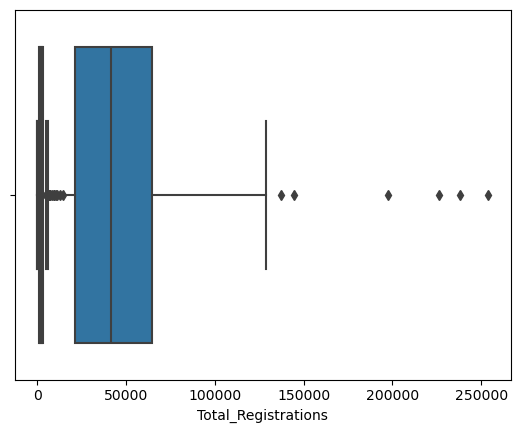

In [ ]:
import seaborn as sns

# 이상치를 제거할 열 선택
columns_to_check = ['Population', 'Pet_Owners', 'Total_Registrations']

# 각 열에 대해 boxplot을 그리고 이상치 식별 및 제거
for column in columns_to_check:
    sns.boxplot(x=df_v2[column])

    # 이상치 제거 (1.5 * IQR 이상 벗어나는 값 제거)
    Q1 = df_v2[column].quantile(0.25)
    Q3 = df_v2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df_v2[(df_v2[column] >= lower_bound) & (df_v2[column] <= upper_bound)]

# 모든 열에 대해 이상치를 제거한 새로운 데이터프레임
df_no_outliers = df

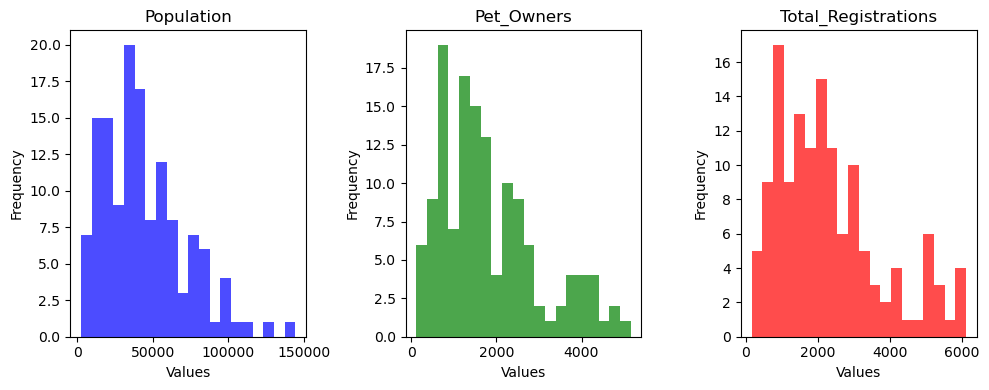

In [ ]:
# 이상치를 제거한 히스토그램 확인

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Population 히스토그램
axs[0].hist(df_no_outliers['Population'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Population')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Pet_Owners 히스토그램
axs[1].hist(df_no_outliers['Pet_Owners'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Pet_Owners')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Total_Registrations 히스토그램
axs[2].hist(df_no_outliers['Total_Registrations'], bins=20, color='red', alpha=0.7)
axs[2].set_title('Total_Registrations')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print(df_v2.shape)
print(df_no_outliers.shape)

(145, 3)
(136, 3)


Train Test Split

V2
- 8:2 split
- 모델 1,2 이상치 제거됨

In [ ]:
from sklearn.model_selection import train_test_split

# Model 1

# 데이터 프레임에서 독립 변수와 종속 변수를 나누기
X = df_no_outliers.drop(columns=['Pet_Owners'])
y = df_no_outliers['Pet_Owners']

# 데이터를 트레인 셋과 테스트 셋으로 나누기
model1_train_x_v2, model1_test_x_v2, model1_train_y_v2, model1_test_y_v2 = train_test_split(X, y, test_size=0.2, random_state=42)


# Model 2

X = df_no_outliers['Population']
y = df_no_outliers['Pet_Owners']

# 데이터를 트레인 셋과 테스트 셋으로 나누기
model2_train_x_v2, model2_test_x_v2, model2_train_y_v2, model2_test_y_v2 = train_test_split(X, y, test_size=0.2, random_state=42)

V3
- 8:2 split
- 이상치 제거 X
- 모델2 독립변수 변경: 'Population','Hospital_Counts','Consignment_Counts'

In [ ]:
from sklearn.model_selection import train_test_split

# Model 2

X = df_v3.drop(columns=['Total_Registrations'])
y = df_v3['Total_Registrations']

# 데이터를 트레인 셋과 테스트 셋으로 나누기
model2_train_x_v3, model2_test_x_v3, model2_train_y_v3, model2_test_y_v3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('./동별통합데이터.csv')
df_raw = pd.DataFrame(data)

# 데이터 확인

df_raw.head(1)
print(df_raw.columns)
print(df_raw.shape)

Index(['Unnamed: 0', 'Gu', 'Dong', 'Hospital_Counts', 'Sales_Counts',
       'Consignment_Counts', 'Transit_Counts', 'Production_Counts',
       'Import_Counts', 'Population', 'Pet_Owners', 'Total_Registrations'],
      dtype='object')
(145, 12)


In [ ]:
# V4 columns
df_v4 = df_raw[['Total_Registrations', 'Hospital_Counts', 'Transit_Counts', 'Population']]
df_v4.head(1)

,Total_Registrations,Hospital_Counts,Transit_Counts,Population
0,2207,5,0,53949


V4 독립변수 정규화작업

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  

# 독립변수와 종속변수 나누기   
x = data[['Hospital_Counts', 'Transit_Counts', 'Population']].values
y = data['Total_Registrations'].values 
y = pd.DataFrame(y)

# 독립변수 정규화 작업
x = StandardScaler().fit_transform(x)

# 컬럼 명 지정
features = ['Hospital_Counts', 'Transit_Counts', 'Population']
pd.DataFrame(x, columns=features).head()

,Hospital_Counts,Transit_Counts,Population
0,0.085263,-0.719800,0.074613
1,-0.189473,-0.719800,-0.409129
2,-0.464210,-0.083392,-0.230630
3,2.557892,-0.401596,1.170657
4,-0.464210,-0.401596,-0.441903


V4 PCA 분석

In [ ]:
# 주성분을 3개로 선택
pca = PCA(n_components=3)
printcipalComponents = pca.fit_transform(x)

# 주성분으로 이루어진 데이터 프레임 구성
principalDf = pd.DataFrame(data=printcipalComponents, 
              columns = ['principal component1','principal component2',
                       'principal component3'])
principalDf

,principal component1,principal component2,principal component3
0,-0.320225,0.505434,-0.415863
1,-0.763985,0.352027,-0.117484
2,-0.444993,-0.278572,-0.003701
3,1.898261,2.083882,-0.358567
4,-0.754344,-0.054549,-0.006079
...,...,...,...
140,-1.142451,0.185409,0.095065
141,-0.920881,0.140578,-0.196186
142,-0.868208,0.211685,0.428532
143,-1.253803,0.207940,0.241436


V4
- 8:2 split
- 정규화작업
- 모델 2 독립변수 'Hospital_Counts', 'Transit_Counts', 'Population'
- PCA 분석 주성부 3개 선택

In [ ]:
from sklearn.model_selection import train_test_split

# Model 2 

x = principalDf
y = y
# 데이터를 트레인 셋과 테스트 셋으로 나누기기
model2_train_x_v4, model2_test_x_v4, model2_train_y_v4, model2_test_y_v4 = train_test_split(x,y, test_size =0.2, random_state=423)

### 3.2 모델링

#### 3.2.1. Model 1

- 독립변수: Population  Total_Registrations
- 종속변수: Pet_Owners

변수 정의
- model_모델명
- result_모델명
- predict_모델명

모델 리스트
- 1_1 Linear Regression
- 1_2 Robust Regression
- 1_3 Random Forest Regressor
- 1_4 XGBRegressor
- 1_5 Gradient Boosting

In [ ]:
import numpy as np
import pandas as pd

# 평가 지표 계산 함수
def score(test_y, predict):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r_squared = r2_score(test_y, predict)
    rmse = mean_squared_error(test_y, predict, squared=False)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared:", r_squared)
    print("RMSE:", rmse)
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [ ]:
# 데이터 불러오기

model1_test_x = pd.read_csv('model1_test_x_v2.csv')
model1_test_y = pd.read_csv('model1_test_y_v2.csv')
model1_train_x = pd.read_csv('model1_train_x_v2.csv')
model1_train_y = pd.read_csv('model1_train_y_v2.csv')

In [ ]:
# 데이터 확인

#model1_test_x = model1_test_x.drop(['Unnamed: 0'],axis=1)
print(model1_test_x.head(1))

#model1_test_y = model1_test_y.drop(['Unnamed: 0'],axis=1)
print(model1_test_y.head(1))

#model1_train_x = model1_train_x.drop(['Unnamed: 0'],axis=1)
print(model1_train_x.head(1))

#model1_train_y = model1_train_y.drop(['Unnamed: 0'],axis=1)
print(model1_train_y.head(1))

   Population  Total_Registrations
0       37543                 1755
   Pet_Owners
0        1414
   Population  Total_Registrations
0       42484                 1534
   Pet_Owners
0        1289


Model 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
# 이 모델은 입력 데이터와 목표 변수 간의 선형 관계를 모델링
# 새로운 데이터에 대한 예측 수행

x = model1_train_x
y = model1_train_y

# 모델 적합
result_linear = model_linear.fit(x,y)

# 결과 출력
predict_linear = result_linear.predict(model1_test_x)

# 평가지표 계산
score(model1_test_y, predict_linear)

Mean Squared Error (MSE): 14749.640976029983
Mean Absolute Error (MAE): 79.08105841507928
R-squared: 0.9882483115440541
RMSE: 121.44809992762333


Model 1. Robust Regression

In [ ]:
import statsmodels.api as sm

# 예시 데이터 생성
x = model1_train_x
y = model1_train_y

# 로버스트 회귀 모델 적합
X_with_const = sm.add_constant(x)  # 상수항 추가
model_robust = sm.RLM(y, X_with_const, M=sm.robust.norms.HuberT())
result_robust = model_robust.fit()

# 결과 출력
predict_robust = result_robust.predict(sm.add_constant(model1_test_x))

# 평가지표 계산
score(model1_test_y, predict_robust)

Mean Squared Error (MSE): 15287.431225999237
Mean Absolute Error (MAE): 78.9034154990146
R-squared: 0.9878198303706782
RMSE: 123.64235207241585


Model 1. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 준비 (X: 독립 변수, y: 종속 변수)
x = model1_train_x
y = model1_train_y

# 랜덤 포레스트 회귀 모델 생성
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model_rf.fit(x, y)

# 예측
predict_rf = model_rf.predict(model1_test_x)

# 평가지표 계산
score(model1_test_y, predict_rf)

Mean Squared Error (MSE): 14338.301838461546
Mean Absolute Error (MAE): 67.9715384615385
R-squared: 0.9885760435479922
RMSE: 119.74264836916522


C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_6020\3334832041.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x, y)


Model 1. XGBRegressor

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
model_xgb.fit(x,y)

# 예측
predict_xgb = model_xgb.predict(model1_test_x)

# 평가지표 계산
score(model1_test_y, predict_rf)

Mean Squared Error (MSE): 14338.301838461546
Mean Absolute Error (MAE): 67.9715384615385
R-squared: 0.9885760435479922
RMSE: 119.74264836916522


Model 1. Gradient Boosting

In [ ]:
# 그래디언트 부스팅 회귀 모델
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 독립 변수와 종속 변수 설정
x = model1_train_x
y = model1_train_y

# 그래디언트 부스팅 회귀 모델 초기화 : 연속된 결과를 예측
# n_estimators : 사용할 부스팅 단계(Boosting Stages)의 수를 결정, 1000개의 의사결정 트리를 순차적으로 생성
# random_state :  800으로 설정하여 동일한 매개변수와 데이터로 알고리즘을 여러 번 실행할 때 동일한 결과를 얻을 수 있습니다.
# max_depth : 앙상블의 각 의사결정 트리의 최대 깊이를 결정, 각 트리의 최대 깊이를 5로 설정하여 사용
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=800, max_depth=5)

# 모델 학습
model_gb = gb_reg.fit(x, y)

# 테스트 데이터에 대한 예측
y_pred_gb = gb_reg.predict(model1_test_x)

# 모델 평가 (RMSE 계산)
#rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# 모델 평가
predict_gb = model_gb.predict(model1_test_x)

score(model1_test_y, predict_gb)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 10097.390618919175
Mean Absolute Error (MAE): 66.7724676596378
R-squared: 0.9919549642622238
RMSE: 100.4857732165065


#### Get Data

Seongdong

In [ ]:
raw_sd = pd.read_csv('seongdong_model1.csv')
#print(raw_sd)

sd = raw_sd[['Population', 'Total_Registrations']]

# Gradient Boosting 모델로 예측
predict_sd = model_gb.predict(sd)

#print(predict_sd)

# Pet_Owners 컬럼 추가 (반올림으로 정수 만듬)

raw_sd['Pet_Owners'] = predict_sd.round().astype(int)

print(raw_sd)

# 데이터 저장

#raw_sd.to_csv('seongdong_m1_result.csv', index=False)

      Dong  Population  Total_Registrations  Pet_Owners
0      금호동       51056                 3690        2770
1      마장동       22170                 1144         881
2      사근동       14235                  352         273
3      성수동       53055                 4076        2943
4      송정동       10077                  735         540
5      옥수동       25631                 1739        1331
6   왕십리도선동       26801                  771         602
7    왕십리2동       16416                 1852        1306
8      용답동       13033                  831         667
9      응봉동       14921                  983         760
10     행당동       36863                 2498        1887


Yangcheon
- Gradient Boosting 모델 재현율이 떨어지는 것을 확인하여 Robust 모델 사용

In [ ]:
raw_yc = pd.read_csv('yangcheon_model1.csv')
#print(raw_yc)

yc = raw_yc[['Population', 'Total_Registrations']]

# Robust 모델로 예측
predict_yc = result_robust.predict(sm.add_constant(yc))

# Pet_Owners 컬럼 추가 (반올림으로 정수 만듬)

raw_yc['Pet_Owners'] = predict_yc.round().astype(int)

print(raw_yc)

# 데이터 저장

#raw_yc.to_csv('yangcheon_m1_result.csv', index=False)

  Dong  Population  Total_Registrations  Pet_Owners
0   목동      115579                 8072        6300
1  신월동      119043                 7375        5775
2  신정동      172803                 9116        7182


Seodaemun

In [ ]:
# 데이터 불러오기
raw_sdm = pd.read_csv('seodaemun_m2_result.csv')
sdm = raw_sdm[['Population', 'Total_Registrations']]
#print(sdm)

# Gradient Boosting 모델로 예측
predict_sdm = model_gb.predict(sdm)
#print(predict_sd)

# Pet_Owners 컬럼 추가 (반올림으로 정수 만듬)
raw_sdm['Pet_Owners'] = predict_sdm.round().astype(int)
print(raw_sdm)

# 데이터 저장

#raw_sdm.to_csv('seodaemun_m1_result.csv', index=False)


   Dong  Population  Hospital_Counts  Consignment_Counts  Total_Registrations  \
0  남가좌동       47253              4.0                 1.0                 2471   
1  북가좌동       48560              5.0                 1.0                 2609   
2  북아현동       15816              2.0                 1.0                  945   
3   신촌동       27079              0.0                 0.0                 1250   
4   연희동       37222              4.0                 8.0                 2191   
5   천연동       16688              0.0                 0.0                  799   
6   충현동       20151              0.0                 0.0                  949   
7   홍은동       51693              3.0                 2.0                 2605   
8   홍제동       55916              3.0                 3.0                 2811   

   Pet_Owners  
0        1945  
1        2039  
2         724  
3         932  
4        1696  
5         664  
6         732  
7        2159  
8        2337  


Mapo

In [ ]:
# 데이터 불러오기
raw_mp = pd.read_csv('mapo_model1.csv')
mp = raw_mp[['Population', 'Total_Registrations']]
#print(sdm)

# Gradient Boosting 모델로 예측
predict_mp = model_gb.predict(mp)
#print(predict_sd)

# Pet_Owners 컬럼 추가 (반올림으로 정수 만듬)
raw_mp['Pet_Owners'] = predict_mp.round().astype(int)
print(raw_mp)

# 데이터 저장

#raw_mp.to_csv('mapo_m1_result.csv', index=False)

   Dong  Population  Total_Registrations  Pet_Owners
0   공덕동       37123                 2177        1701
1   대흥동       16269                 1294         975
2   도화동       20899                 1410        1104
3   망원동       37630                 2954        2165
4   상암동       30414                 1777        1379
5   서강동       25405                 2213        1681
6   서교동       26359                 3107        2173
7   성산동       58046                 3373        2689
8   신수동       22496                 1076         806
9   아현동       29308                 1327        1021
10  연남동       15190                 1303         977
11  염리동       17664                  881         684
12  용강동       21642                  459         322
13  합정동       16717                 1435        1089


Dobong

In [ ]:
# 데이터 불러오기
raw_db = pd.read_csv('dobong_model1.csv')
db = raw_db[['Population', 'Total_Registrations']]
#print(sdm)

# Gradient Boosting 모델로 예측
predict_db = model_gb.predict(db)
#print(predict_sd)

# Pet_Owners 컬럼 추가 (반올림으로 정수 만듬)
raw_db['Pet_Owners'] = predict_db.round().astype(int)
print(raw_db)

# 데이터 저장

#raw_db.to_csv('dobong_m1_result.csv', index=False)

  Dong  Population  Total_Registrations  Pet_Owners
0  도봉동       46365                 2081        1707
1  방학동       72899                 3481        2713
2  쌍문동       73938                 3717        2787
3   창동      116292                 5397        4154


#### 3.2.2. Model 2

- 독립변수: Population, Hospital_Counts, Consignment_Counts
- 종속변수: Total_Registrations

### 변수 정의
- model_모델명
- result_모델명
- predict_모델명

### 모델 리스트
- 2_1 Linear Regression
- 2_2 Robust Regression
- 2_3 Random Forest
- 2_4 Ridge
- 2_5 ElasticNet
- 2_6 Lasso

In [ ]:
import numpy as np
import pandas as pd

# 평가 지표 계산 함수
def score(test_y, predict):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r_squared = r2_score(test_y, predict)
    rmse = mean_squared_error(test_y, predict, squared=False)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared:", r_squared)
    print("RMSE:", rmse)


In [ ]:
# 데이터 불러오기

model2_test_x = pd.read_csv('model2_test_x_v3.csv')
model2_test_y = pd.read_csv('model2_test_y_v3.csv')
model2_train_x = pd.read_csv('model2_train_x_v3.csv')
model2_train_y = pd.read_csv('model2_train_y_v3.csv')

In [ ]:
# 데이터 확인

#model2_test_x = model2_test_x.drop(['Unnamed: 0'],axis=1)
print(model2_test_x.head(1))
print(model2_test_x.shape)

#model2_test_y = model2_test_y.drop(['Unnamed: 0'],axis=1)
print(model2_test_y.head(1))
print(model2_test_y.shape)

#model2_train_x = model2_train_x.drop(['Unnamed: 0'],axis=1)
print(model2_train_x.head(1))
print(model2_train_x.shape)

#model2_train_y = model2_train_y.drop(['Unnamed: 0'],axis=1)
print(model2_train_y.head(1))
print(model2_train_x.shape)

   Population  Hospital_Counts  Consignment_Counts
0       25755                2                   1
(29, 3)
   Total_Registrations
0                 1884
(29, 1)
   Population  Hospital_Counts  Consignment_Counts
0       73717                1                   4
(116, 3)
   Total_Registrations
0                 1551
(116, 3)


Model2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear= LinearRegression()

x = model2_train_x
y = model2_train_y

# 모델 적합
result_linear = model_linear.fit(x, y)

# 결과 출력
predict_linear = result_linear.predict(model2_test_x)

# 미세조정
predict_linear = np.clip(predict_linear, 0, 9336.715817321081)

# 평가지표 계산
score(model2_test_y, predict_linear)

Mean Squared Error (MSE): 565797.794442185
Mean Absolute Error (MAE): 599.8813168791842
R-squared: 0.8868171638837297
RMSE: 752.1953166845597


Model2. Robust Regression

In [ ]:
import statsmodels.api as sm

# 예시 데이터 생성
x = model2_train_x
y = model2_train_y

# 로버스트 회귀 모델 적합
X_with_const = sm.add_constant(x)  # 상수항 추가
model_robust = sm.RLM(y, X_with_const, M=sm.robust.norms.HuberT())
result_robust = model_robust.fit()

# 결과 출력
predict_robust = result_robust.predict(sm.add_constant(model2_test_x))

# 미세조정
predict_robust = np.clip(predict_robust, 0, 9894.280840991367)

# 평가지표 계산
score(model2_test_y, predict_robust)


Mean Squared Error (MSE): 501976.4424248445
Mean Absolute Error (MAE): 568.5995680471569
R-squared: 0.8995840599322005
RMSE: 708.5029586563803


Model2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 준비 (X: 독립 변수, y: 종속 변수)
x = model2_train_x
y = model2_train_y

# 랜덤 포레스트 회귀 모델 생성
model_rf = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=800)

# 모델 학습
model_rf.fit(x, y)

# 예측
predict_rf = model_rf.predict(model2_test_x)

# 평가지표 계산
score(model2_test_y, predict_rf)

C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_51228\1211823123.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x, y)


Mean Squared Error (MSE): 785678.5440872667
Mean Absolute Error (MAE): 661.9924708207811
R-squared: 0.8428319679415335
RMSE: 886.385099201959


Model2. Ridge

In [ ]:
from sklearn.linear_model import Ridge

alpha = 0.8  # 규제 강도 (하이퍼파라미터)
model_ridge = Ridge(alpha=alpha)
x = model2_train_x
y = model2_train_y

# 모델 학습
model_ridge.fit(x,y)

# 테스트 데이터로 예측
predict_ridge = model_ridge.predict(model2_test_x)

# 평가지표 계산
score(model2_test_y, predict_ridge)

Mean Squared Error (MSE): 668944.9007397731
Mean Absolute Error (MAE): 651.030643940036
R-squared: 0.86618349909637
RMSE: 817.8905187980681


Model2. ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

# 엘라스틱넷 회귀 모델 생성
alpha = 8.0 # L1 및 L2 규제 강도 (하이퍼파라미터)
l1_ratio = 0.1  # L1 규제의 비율 (하이퍼파라미터)
model_el = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

x = model2_train_x
y = model2_train_y

# 모델 학습
model_el.fit(x,y)

# 테스트 데이터로 예측
predict_el = model_el.predict(model2_test_x)

# 미세조정
predict_el = np.clip(predict_el, 0, 9894.280840991367)

# 평가지표 계산
score(model2_test_y, predict_el)

Mean Squared Error (MSE): 434424.47177639836
Mean Absolute Error (MAE): 531.6760166457444
R-squared: 0.9130972331865643
RMSE: 659.1088466834582


Model2. Lasso

In [ ]:
from sklearn.linear_model import Lasso

alpha = 480  # 규제 강도 (하이퍼파라미터)
model_lasso = Lasso(alpha=alpha)

x = model2_train_x
y = model2_train_y

# 모델 학습
model_lasso.fit(x,y)

# 테스트 데이터로 예측
predict_lasso = model_lasso.predict(model2_test_x)

# 평가지표 계산
score(model2_test_y, predict_lasso)

Mean Squared Error (MSE): 601301.5294254271
Mean Absolute Error (MAE): 614.6692107608624
R-squared: 0.8797149562441868
RMSE: 775.4363477587488


#### Get Data

Seodaemun

In [ ]:
raw_sdm = pd.read_csv('seodaemun_model2.csv')
#print(raw_sdm)

sdm = raw_sdm[['Population',  'Hospital_Counts',  'Consignment_Counts']]

# ElasticNet 모델로 예측
predict_sdm = model_el.predict(sdm)

# 미세조정
predict_sdm = np.clip(predict_sdm, 0, 9894.280840991367)

#print(predict_sdm)

# Total_Registration 컬럼 추가 (반올림으로 정수 만듬)

raw_sdm['Total_Registrations'] = predict_sdm.round().astype(int)

print(raw_sdm)

# 데이터 저장

#raw_sdm.to_csv('seodaemun_m2_result.csv', index=False)


   Dong  Population  Hospital_Counts  Consignment_Counts  Total_Registrations
0  남가좌동       47253              4.0                 1.0                 2471
1  북가좌동       48560              5.0                 1.0                 2609
2  북아현동       15816              2.0                 1.0                  945
3   신촌동       27079              0.0                 0.0                 1250
4   연희동       37222              4.0                 8.0                 2191
5   천연동       16688              0.0                 0.0                  799
6   충현동       20151              0.0                 0.0                  949
7   홍은동       51693              3.0                 2.0                 2605
8   홍제동       55916              3.0                 3.0                 2811


#### 3.2.3. 성능 개선 및 최적 모델 선정

V4
- 8:2 split
- 정규화작업
- 모델 2 독립변수 'Hospital_Counts', 'Transit_Counts', 'Population'
- PCA 분석 주성분 3개 선택

In [ ]:
from sklearn.model_selection import train_test_split

# Model 2 

x = principalDf
y = y
# 데이터를 트레인 셋과 테스트 셋으로 나누기기
model2_train_x_v4, model2_test_x_v4, model2_train_y_v4, model2_test_y_v4 = train_test_split(x,y, test_size =0.2, random_state=423)

성능확인 

In [ ]:
import numpy as np
import pandas as pd

# 평가 지표 계산 함수
def score(test_y, predict):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r_squared = r2_score(test_y, predict)
    rmse = mean_squared_error(test_y, predict, squared=False)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared:", r_squared)
    print("RMSE:", rmse)


In [ ]:
from sklearn.linear_model import Ridge

alpha = 0.9  # 규제 강도 (하이퍼파라미터)
model_ridge = Ridge(alpha=alpha)
x = model2_train_x_v4
y = model2_train_y_v4
# 모델 학습
model_ridge.fit(x,y)

# 테스트 데이터로 예측
predict_ridge = model_ridge.predict(model2_test_x_v4)

# 평가지표 계산
score(model2_test_y_v4, predict_ridge)


Mean Squared Error (MSE): 311842.1324716351
Mean Absolute Error (MAE): 435.5419943120359
R-squared: 0.9532510804547811
RMSE: 558.4282697640182


PCA 분석으로 성능 개선에 성공.

R-squared 0.95로 종속변수의 변동성을 잘 설명고 있으나,

독립변수 3개, 주성분 3개, 이로인해 과적합과 복잡성 문제 발생 가능성을 확인함.

=> 주성분을 줄이며, 과적합과 복잡성 문제 해결 시도

V4
- 8:2 split
- 정규화작업
- 모델 2 독립변수 'Hospital_Counts', 'Transit_Counts', 'Population'
- PCA 분석 주성부 2개 선택

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  

# 독립변수와 종속변수 나누기   
x = data[['Hospital_Counts', 'Transit_Counts', 'Population']].values
y = data['Total_Registrations'].values 
y = pd.DataFrame(y)

# 독립변수 정규화 작업
x = StandardScaler().fit_transform(x)

# 컬럼 명 지정
features = ['Hospital_Counts', 'Transit_Counts', 'Population']
pd.DataFrame(x, columns=features).head()

# 주성분을 2개로 선택
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)

# 주성분으로 이루어진 데이터 프레임 구성
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1','principal component2'])
principalDf

from sklearn.model_selection import train_test_split

# Model 2 

x = principalDf
y = y
# 데이터를 트레인 셋과 테스트 셋으로 나누기기
model2_train_x_v4, model2_test_x_v4, model2_train_y_v4, model2_test_y_v4 = train_test_split(x,y, test_size =0.2, random_state=231)

In [ ]:
from sklearn.linear_model import Ridge

alpha = 0.751216# 규제 강도 (하이퍼파라미터)
model_ridge = Ridge(alpha=alpha)
x = model2_train_x_v4
y = model2_train_y_v4
# 모델 학습
model_ridge.fit(x,y)

# 테스트 데이터로 예측
predict_ridge = model_ridge.predict(model2_test_x_v4)

# 평가지표 계산
score(model2_test_y_v4, predict_ridge)
# 232  R-squared: 0.939936572236506

Mean Squared Error (MSE): 494184.1923285271
Mean Absolute Error (MAE): 551.0577162141601
R-squared: 0.9400213242499704
RMSE: 702.9823556310123


성능 개선을 시도했으나,

주성분을 3개로 선택했을 때 보다 더 낮은 R-squared 0.94의 값을 확인

## 4. 시각화 

### 4.1 Bubble Chart

df_store 사용
- x axis : Total_Registration
- y axis : Pet_Owners
- Marker : Dong
- size : Store_Counts
- Color : Gu

Total Registrations 상위 10개 동만 강조

상위 10개 동 확대

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

df = Dong_10_total

top_10_gu = df['Gu'].tolist()
# colors 리스트에 색상 지정
colors = ['3a86ff', '8338ec', 'ff006e', 'fb5607', 'ffbe0b', 'bc4749','a7c957','bc4749','6a994e','386641','f2e8cf']

# 버블의 색상을 저장할 리스트 생성
bubble_colors = []
gu_colors = []

# 각 Gu에 대한 색상 할당
gu_colors = {}
for i, gu in enumerate(df['Gu'].unique()):
    if gu in top_10_gu:
        index = top_10_gu.index(gu)
        gu_colors[gu] = colors[index % len(colors)]
    else:
        gu_colors[gu] = 'gray'  # 상위 10개 Gu가 아닌 경우 회색으로 표시

# 각 도시별로 색상 할당
bubble_colors = [gu_colors[gu] for gu in df['Gu']]

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['Total_Registrations'],
  y = df['Pet_Owners'],
  path = df['Dong'],
  text = df['Dong'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = df['Store_Counts'],
      sizemode = 'area',
      sizeref = 0.02,
      color = bubble_colors
  ),
  transforms = [
      dict(
        type = 'groupby',
        groups = df['Gu'],
        styles = opts
    )]
)]

layout = dict(
    title = '총 반려동물 등록 상위 10개 동 (범례: 구)',  # 그래프 제목 설정
    xaxis = dict(title = 'Total_Registrations'),  # X축 레이블 설정
    yaxis = dict(
        title = 'Pet_Owners',  # Y축 레이블 설정
        type = 'log'
    )
)
import plotly.graph_objects as go


fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

Gu 사용
- x axis : Total_Registration
- y axis : Pet_Owners
- Marker : Dong
- size : Store_Counts
- Color : Gu

상위 10개 구 강조

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

df = Gu_10_total

# 데이터프레임을 'Total_Registrations' 열을 기준으로 내림차순으로 정렬

# 상위 10개의 데이터를 선택

# 상위 10개의 동을 리스트로 저장
top_10_gu = df['Gu'].tolist()


# colors 리스트에 색상 지정
colors = ['3a86ff', '8338ec', 'ff006e', 'fb5607', 'ffbe0b', 'bc4749','a7c957','bc4749','6a994e','386641','f2e8cf']

# 버블의 색상을 저장할 리스트 생성
bubble_colors = []
gu_colors = []

# 각 Gu에 대한 색상 할당

gu_colors = {}
for i, gu in enumerate(df['Gu'].unique()):
    if gu in top_10_gu:
        index = top_10_gu.index(gu)
        gu_colors[gu] = colors[index % len(colors)]
    else:
        gu_colors[gu] = 'gray'  # 상위 10개 Gu가 아닌 경우 회색으로 표시

# 각 도시별로 색상 할당
bubble_colors = [gu_colors[gu] for gu in df['Gu']]

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['Total_Registrations'],
  y = df['Pet_Owners'],
  text = df['Gu'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = df['Store_Counts'],
      sizemode = 'area',
      sizeref = 0.05,
      color = bubble_colors
  ),
  transforms = [
      dict(
        type = 'groupby',
        groups = df['Gu'],
        styles = opts
    )]
)]

layout = dict(
    title = '총 반려동물 등록 상위 10개 구',  # 그래프 제목 설정
    xaxis = dict(title = 'Total_Registrations'),  # X축 레이블 설정
    yaxis = dict(
        title = 'Pet_Owners',  # Y축 레이블 설정
        type = 'log'
    )
)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

총반려동물등록수 상위 10개 구: 
 - ['은평구' '송파구' '강남구' '강서구' '노원구' '관악구' '양천구' '서초구' '마포구' '중랑구']

총반려동물등록수 상위 10개 구의 인구수 대비 반려동물 등록 비율 상위 10개 동

In [ ]:
import plotly.io as pio

df = df_10Gu_ratio_head10
colors = ['3a86ff', '8338ec', 'ff006e', 'fb5607', 'ffbe0b', 'bc4749','a7c957','bc4749','6a994e','386641','f2e8cf']

opt = []
opts = []
for i in range(0, len(colors)):
    opt = dict(
        target = df['Dong'].unique(), value = dict(marker = dict(color = colors[i]))
    )
    opts.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['Total_Registrations'],
  y = df['Pet_Owners'],
  text = df['Dong'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = df['Store_Counts'],
      sizemode = 'area',
      sizeref = 0.01
  ),
  transforms = [
      dict(
        type = 'groupby',
        groups = df['Gu'],
        styles = opts
    )]
)]

layout = dict(
    title = '상위 10개 구의 인구수 대비 반려동물 등록 비율 상위 10개 동',  # 그래프 제목 설정
    xaxis = dict(title = 'Total_Registrations'),  # X축 레이블 설정
    yaxis = dict(
        title = 'Pet_Owners',  # Y축 레이블 설정
        type = 'log'
    )
)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

### 4.2 지도 구현

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import requests
import json

In [ ]:
Animal_beauty_Count = pd.read_csv('Map_Animal_beauty_Count.csv')
Animal_Cafe_Count = pd.read_csv('Map_Animal_Cafe_Count.csv')
Animal_Hospital_Count = pd.read_csv('Map_Animal_Hospital_Count.csv')
Animal_Hotel_Count = pd.read_csv('Map_Animal_Hotel_Count.csv')
Animal_Store_Count = pd.read_csv('Map_Animal_Store_Count.csv')

In [ ]:
# json  :  키-값 쌍으로 구성된 데이터 객체


def add_markers_to_cluster(dataframe, marker_cluster):
    for index, row in dataframe.iterrows():
        color = None
        if row['Dong'] in ['역삼동', '상계동', '논현동', '화곡동', '신림동', '목동', '삼성동', '방배동', '미아동', '수유동']:
            if row['Dong'] == '역삼동':
                color = 'darkred'
            elif row['Dong'] == '상계동':
                color = 'green'
            elif row['Dong'] == '논현동':
                color = 'purple'
            elif row['Dong'] == '화곡동':
                color = 'orange'
            elif row['Dong'] == '신림동':
                color = 'beige'
            elif row['Dong'] == '목동':
                color = 'lightblue'
            elif row['Dong'] == '삼성동':
                color = 'darkblue'
            elif row['Dong'] == '방배동':
                color = 'pink'
            elif row['Dong'] == '미아동':
                color = 'black'
            elif row['Dong'] == '수유동':
                color = 'gray'

            # 지도 위 마커와 팝업을 추가하는 것
            popup = folium.Popup(row['Gu'] + ' ' + row['Dong'] + ' ' + row['Category3'] + ': ' + str(row['Counts']), max_width=200)
            folium.Marker(location=[row['Y'], row['X']],
                          popup=popup,
                          icon=folium.Icon(color=color)).add_to(marker_cluster)

# CartoDB dark_matter cartodbpositron 둘 중 하나가 적합해 보임.
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)

# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(map_folium)

# 각 카테고리 마커
add_markers_to_cluster(Animal_Cafe_Count, marker_cluster)
add_markers_to_cluster(Animal_Hospital_Count, marker_cluster)
add_markers_to_cluster(Animal_beauty_Count, marker_cluster)
add_markers_to_cluster(Animal_Store_Count, marker_cluster)
add_markers_to_cluster(Animal_Hotel_Count, marker_cluster)

# 범례 추가
legend_html = '''
     <div style="position: fixed;
                 top: 10px; right: 10px;
                 width: 150px;
                 height: 220px;
                 border:3px solid grey;
                 z-index:9999;
                 font-size:12px;
                 background-color:white;
                 opacity: 0.7; padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;강남구 역삼동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;노원구 상계동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;강남구 논현동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;강서구 화곡동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="beige"/>
     </svg>
     &nbsp;관악구 신림동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="lightblue"/>
     </svg>
     &nbsp;양천구 목동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkblue"/>
     </svg>
     &nbsp;강남구 삼성동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="pink"/>
     </svg>
     &nbsp;서초구 방배동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="black"/>
     </svg>
     &nbsp;강북구 미아동<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="gray"/>
     </svg>
     &nbsp;강북구 수유동<br>
     <svg height="15" width="15">
      </div>
     '''

map_folium.get_root().html.add_child(folium.Element(legend_html))

# 서울 행정구역 정보 추가
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
seoul_geo = r.json()

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map_folium)

map_folium #.save('Top10_Seoul_Pet_Facility_Map.html')